Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
num_days_R_prediction=63

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=36 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN           United States  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/25/20  \
185        0        0        0        0        0        0  ...       21   
186        0        0        0        0        0        0  ...       57   
187        0        0        0        0        0        0  ...      164   
188        0        0        0        0        0        0  ...        8   
189        0        0        0        0        0        0  ...        0   
190        0        0        0        0        0        0  ...        1   
191        0        0        0        0        0        0  ...       17   
192        0        0        0        0        0        0  ...     6207   
193        0        0        0        0        0        0  ...       22   
194        0        0        0        0        0        0  ...      137   

     8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  \
185       21       21       21       22       23       23      23   
186       59       60       65       69       72       75      81   
187      175      183      195      207      221      228     239   
188        8        8        9       10       10       10      10   
189        0        0        0        0        0        0       0   
190        1        1        1        1        1        1       1   
191       17       17       17       17       17       17      19   
192     6215     6218     6220     6224     6224     6224    6230   
193       22       22       22       22       22       22      22   
194      137      137      137      137      137      137     141   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 230 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/25/20  \
175        0        0        0        0        0        0  ...      565   
176        0        0        0        0        0        0  ...        7   
177        0        0        0        0        0        0  ...       34   
178        0        0        0        0        0        0  ...      147   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...     1539   
181        0        0        0        0        0        0  ...     2913   
182        0        0        0        0        0        0  ...     1084   
183        0        0        0        0        0        0  ...    39964   
184        0        0        0        0        0        0  ...    10210   

     8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  \
175      587      608      743      765      765      768     857   
176        7        7        7        7        7        7       7   
177       34       35       35       35       35       35      35   
178      179      179      179      179      179      200     241   
179        0        0        0        0        0        0       0   
180     1554     1561     1568     1570     1585     1598    1606   
181     2913     2913     2913     2913     2913     2913    2913   
182     1084     1084     1085     1085     1085     1088    1088   
183    40281    40726    41017    41314    41513    41638   42010   
184    10507    10722    10933    11014    11062    11157   11525   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 230 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/25/20  \
185        0        0        0        0        0        0  ...     3508   
186        0        0        0        0        0        0  ...     6160   
187        0        0        0        1        1        1  ...    33533   
188        0        0        0        0        0        0  ...     1670   
189        0        0        0        0        0        0  ...       13   
190        0        0        0        0        0        0  ...       49   
191        0        0        0        0        0        0  ...      408   
192        0        0        0        0        0        0  ...    67543   
193        0        0        0        0        0        0  ...     1695   
194        0        0        0        0        0        0  ...     4494   

     8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  9/1/20  \
185     3590     3651     3697     3760     3821     3916    4039   
186     6431     6712     6906     7116     7365     7550    7692   
187    34418    35529    36456    37340    38561    39460   40529   
188     1760     1848     1906     1975     1997     2006    2104   
189       13       13       14       15       15       15      16   
190       53       55       62       62       67       68      71   
191      442      444      444      444      460      476     482   
192    68114    68624    69131    69632    70140    70667   71129   
193     1702     1714     1727     1729     1738     1752    1757   
194     4494     4494     4494     4494     4494     4494    4668   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 230 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN     Seychelles  -4.679600   55.492000        0        0   
221            NaN   Sierra Leone   8.460555  -11.779889        0        0   
222            NaN      Singapore   1.283300  103.833300        0        1   
223            NaN       Slovakia  48.669000   19.699000        0        0   
224            NaN       Slovenia  46.151200   14.995500        0        0   
225            NaN        Somalia   5.152149   46.199616        0        0   
226            NaN   South Africa -30.559500   22.937500        0        0   
227            NaN    South Sudan   6.877000   31.307000        0        0   
228            NaN          Spain  40.463667   -3.749220        0        0   
229            NaN      Sri Lanka   7.873054   80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  8/25/20  8/26/20  8/27/20  \
220        0        0        0        0  ...      136      136      136   
221        0        0        0        0  ...     2001     2003     2013   
222        3        3        4        5  ...    56435    56495    56572   
223        0        0        0        0  ...     3452     3536     3626   
224        0        0        0        0  ...     2686     2722     2755   
225        0        0        0        0  ...     3275     3275     3275   
226        0        0        0        0  ...   613017   615701   618286   
227        0        0        0        0  ...     2507     2510     2514   
228        0        0        0        0  ...   412553   419849   429507   
229        0        0        0        1  ...     2971     2984     2986   

     8/28/20  8/29/20  8/30/20  8/31/20  9/1/20   Population   \
220      136      136      136      136     136           NaN   
221     2013     2019     2022     2022    2028           NaN   
222    56666    56717    56771    56812   56852     5,612,000   
223     3728     3842     3876     3917    3989     5,459,087   
224     2797     2834     2865     2883    2924     2,078,878   
225     3275     3310     3310     3310    3310           NaN   
226   620132   622551   625056   627041  628259    59,148,674   
227     2518     2519     2519     2527    2527           NaN   
228   439286   439286   439286   462858  470973    46,660,000   
229     2989     2995     3012     3049    3092    21,440,000   

               region  
220    Seychelles_nan  
221  Sierra Leone_nan  
222     Singapore_nan  
223      Slovakia_nan  
224      Slovenia_nan  
225       Somalia_nan  
226  South Africa_nan  
227   South Sudan_nan  
228         Spain_nan  
229     Sri Lanka_nan  

[10 rows x 230 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

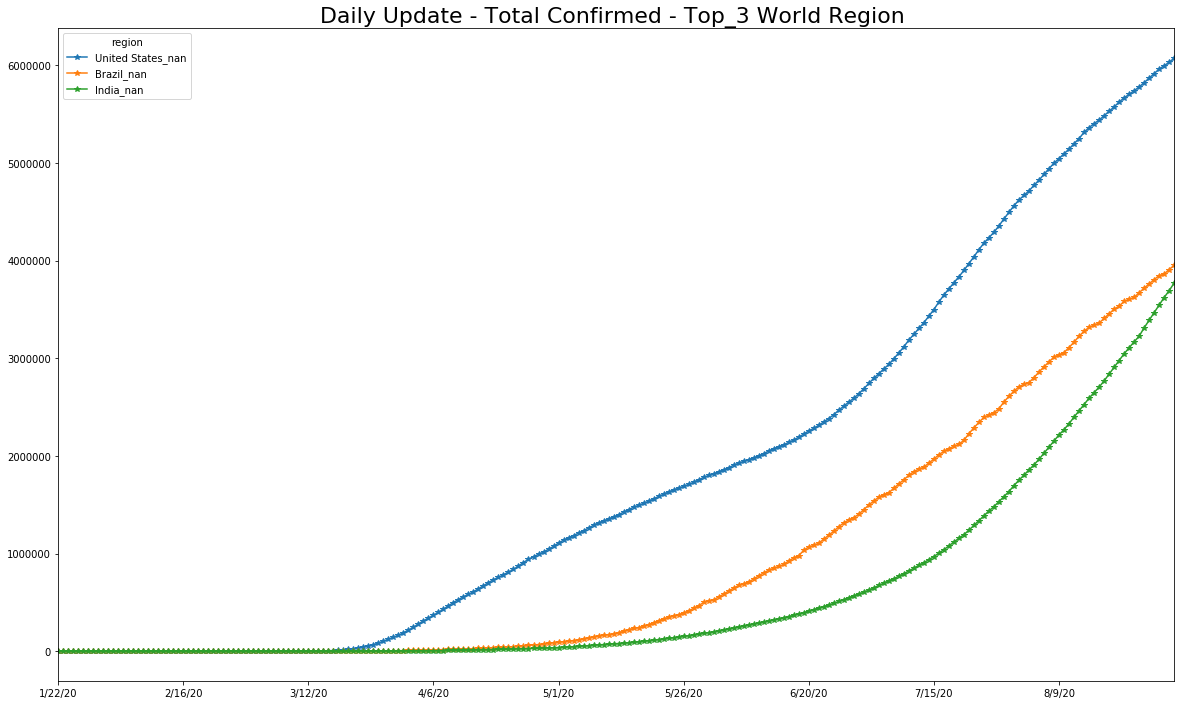

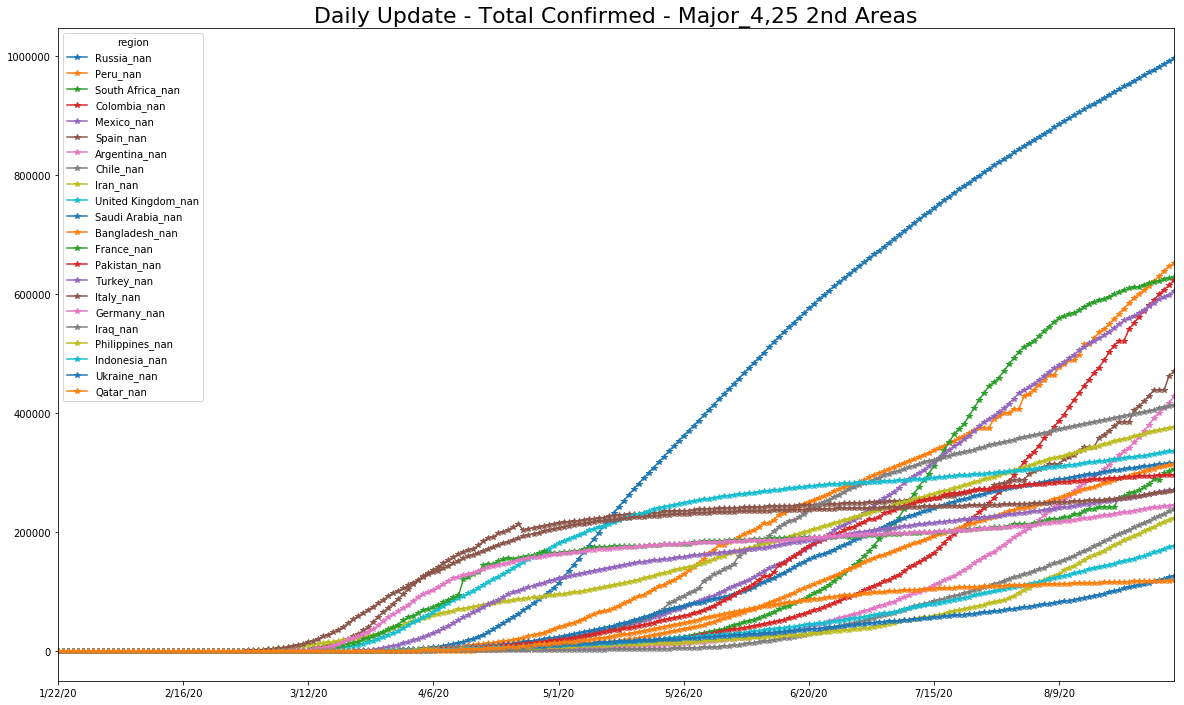

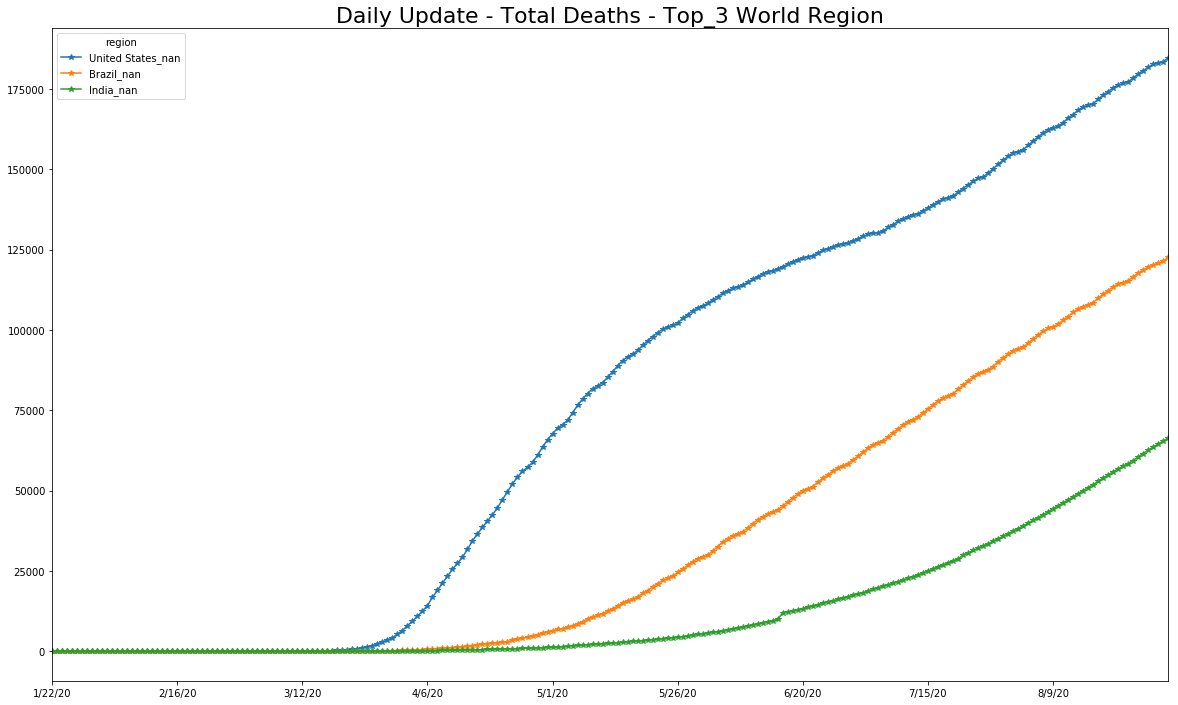

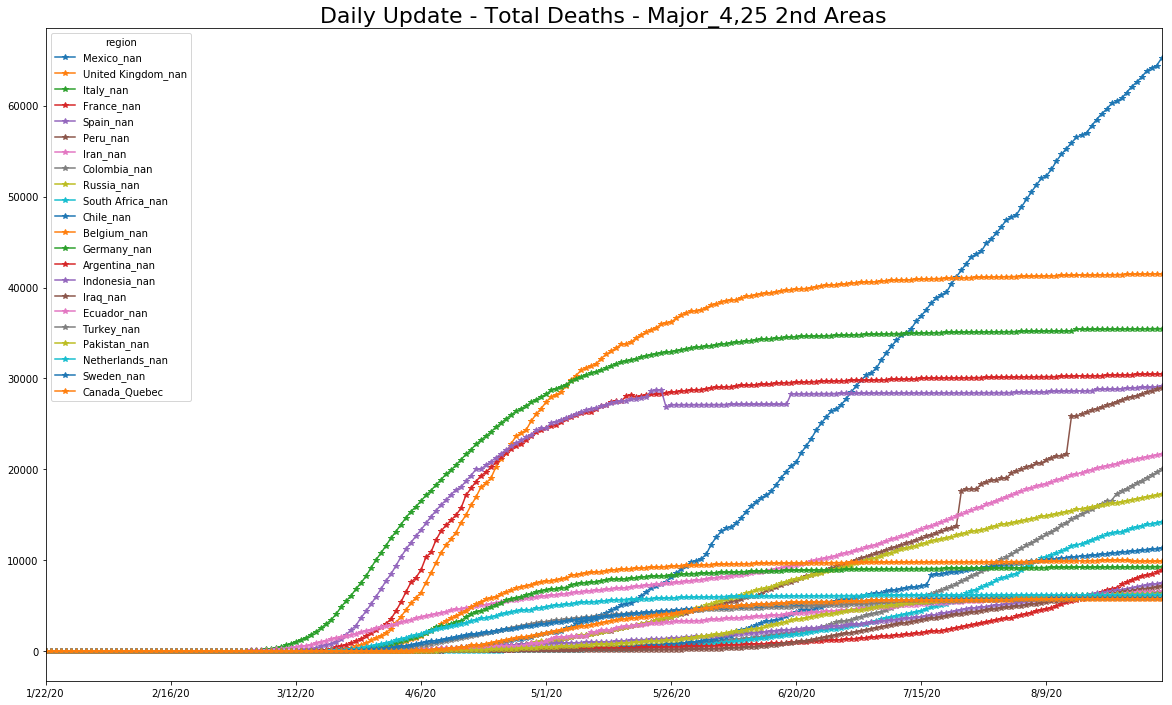

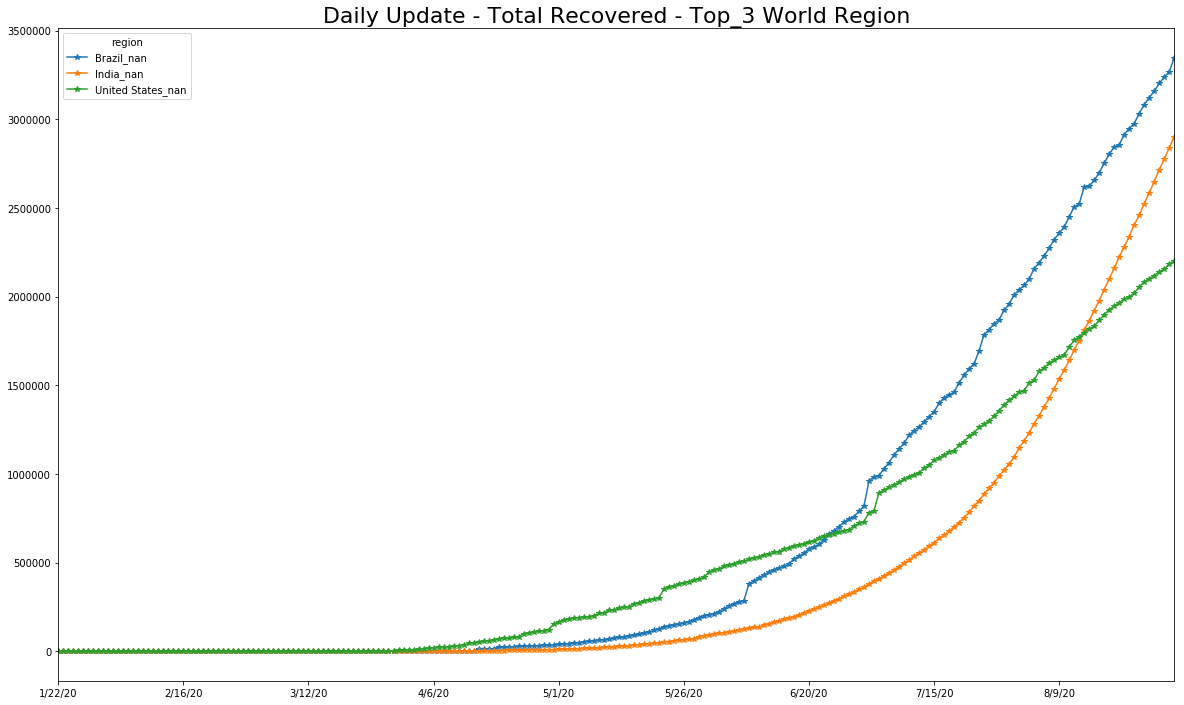

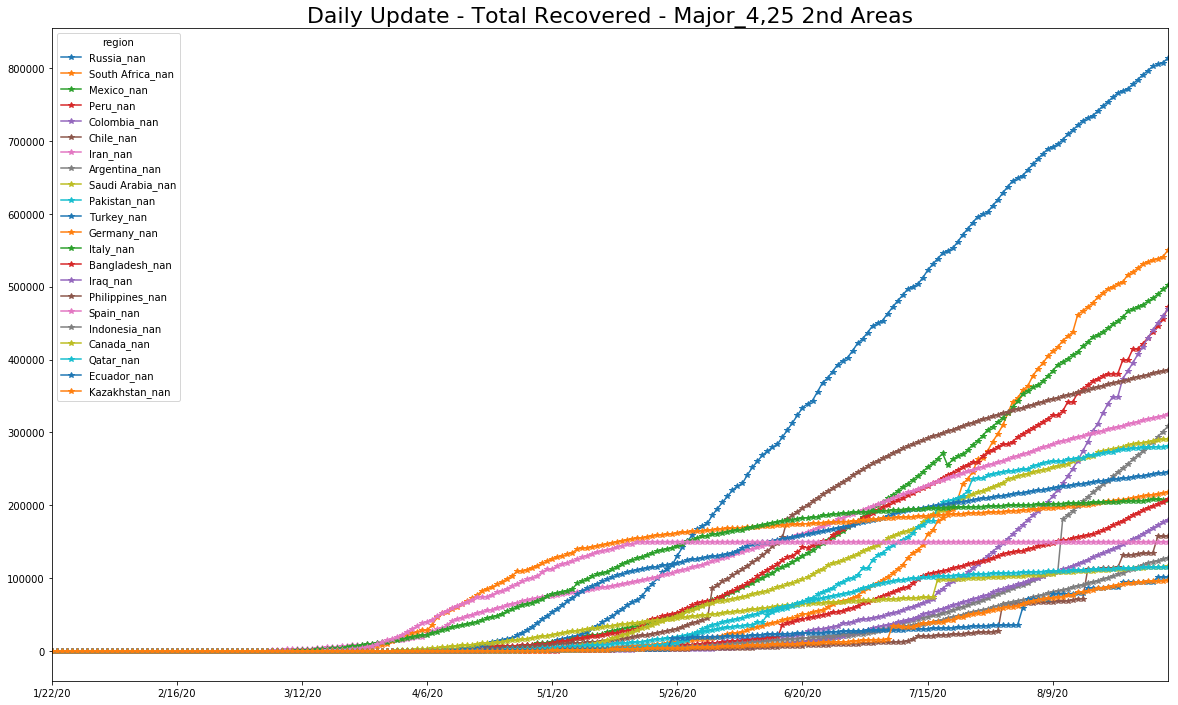

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/09/02


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
8/29/20            38143         9279        43781         1124        2551   
8/30/20            38162         9380        44146         1124        2624   
8/31/20            38165         9513        44494         1176        2654   
9/1/20             38196         9606        44833         1184        2729   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
8/29/20                       94         401239        43626   
8/30/20                       94         408426        43750   
8/31/20                       94         417735        43781   
9/1/20                        94         428239        43878   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
8/29/20                                     113                       4040   
8/30/20                                     113                       4050   
8/31/20                                     113                       4063   
9/1/20                                      113                       4079   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
8/29/20  ...            5961094         1570           41067          44946   
8/30/20  ...            5996431         1585           41424          45868   
8/31/20  ...            6030587         1595           41893          46728   
9/1/20   ...            6073840         1611           42127          47756   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
8/29/20         1040                   21668                  10       1946   
8/30/20         1040                   22204                  10       1953   
8/31/20         1044                   22729                  10       1958   
9/1/20          1044                   23281                  10       1962   

region   Zambia_nan  Zimbabwe_nan  
8/29/20       11902          6406  
8/30/20       12025          6412  
8/31/20       12097          6497  
9/1/20        12381          6559  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
56250 2020-08-04     Zimbabwe_nan       4221           154           906   
56251 2020-08-05     Zimbabwe_nan       4221           146           562   
56252 2020-08-06     Zimbabwe_nan       4339             0           300   
56253 2020-08-07     Zimbabwe_nan       4451           118           264   
56254 2020-08-08     Zimbabwe_nan       4575           112           230   
56255 2020-08-09     Zimbabwe_nan       4649           124           354   
56256 2020-08-10     Zimbabwe_nan       4748            74           310   
56257 2020-08-11     Zimbabwe_nan       4818            99           297   
56258 2020-08-12     Zimbabwe_nan       4893            70           243   
56259 2020-08-13     Zimbabwe_nan       4990            75           244   
56260 2020-08-14     Zimbabwe_nan       5072            97           242   
56261 2020-08-15     Zimbabwe_nan       5176            82           254   
56262 2020-08-16     Zimbabwe_nan       5261           104           283   
56263 2020-08-17     Zimbabwe_nan       5308            85           271   
56264 2020-08-18     Zimbabwe_nan       5378            47           236   
56265 2020-08-19     Zimbabwe_nan       5643            70           202   
56266 2020-08-20     Zimbabwe_nan       5745           265           382   
56267 2020-08-21     Zimbabwe_nan       5815           102           437   
56268 2020-08-22     Zimbabwe_nan       5893            70           437   
56269 2020-08-23     Zimbabwe_nan       5930            78           250   
56270 2020-08-24     Zimbabwe_nan       6070            37  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
56279 2020-09-02  Zimbabwe_nan          0            62           153   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
56279           363         100.954441         102.388542          105.85878   

       last_day  kalman_prediction  population  infected_rate  min  max  
56279      6559             6610.0    14862924       0.000004  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
56277  2020-08-31  Zimbabwe_nan       6497             6           120   
56278  2020-09-01  Zimbabwe_nan       6559            85           109   
56279  2020-09-02  Zimbabwe_nan          0            62           153   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
56277           482         100.093818         101.907343         108.128331   
56278           427         101.325795         101.706481         107.034761   
56279           363         100.954441         102.388542         105.858780   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
56277                 6412  ...    14862924       0.000004  NaN  NaN   
56278                 6497  ...    14862924       0.000004  NaN  NaN   
56279                 6559  ...    14862924       0.000004  NaN  NaN   

       population_percentage : infected_rate confirmed  \
56277                                         0.000431   
56278                                         0.000437   
56279                                         0.000441   

       population_percentage : factor 9/10 infected_rate confirmed  \
56277                                           0.004315             
56278                                           0.004372             
56279                                           0.004414             

       delta : new_cases  delta : new_cases per 1M hab  \
56277              110.0                      7.400966   
56278               64.0                      4.306017   
56279               51.0                      3.431357   

       delta : roling 7day AVG  \
56277                68.857143   
56278                61.000000   
56279                51.857143   

       delta : aprox 14-day case notification rate per 100k hab  
56277                                           6.485938         
56278                                           5.745841         
56279                                           4.884638         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.790770e+11  423174.928045  34812.789474


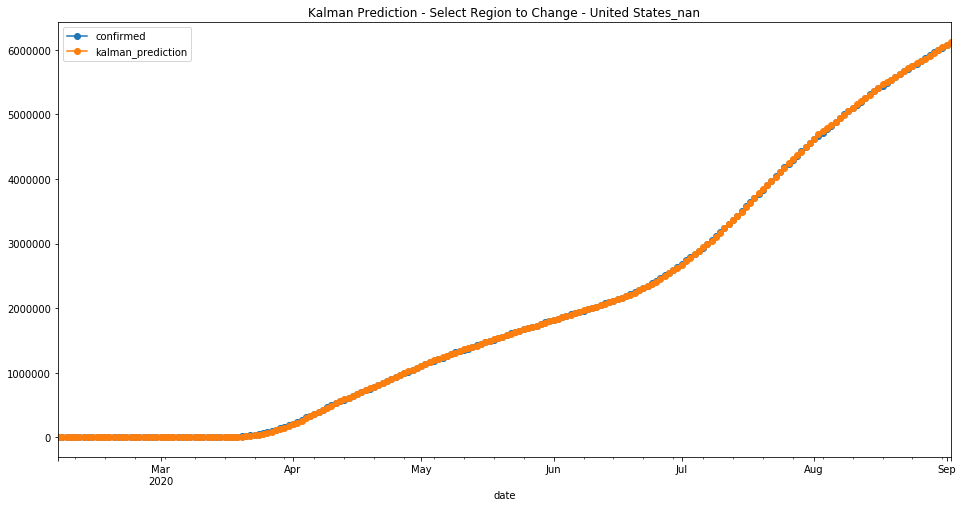

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  4.803637e+09  69308.277674  5390.095694


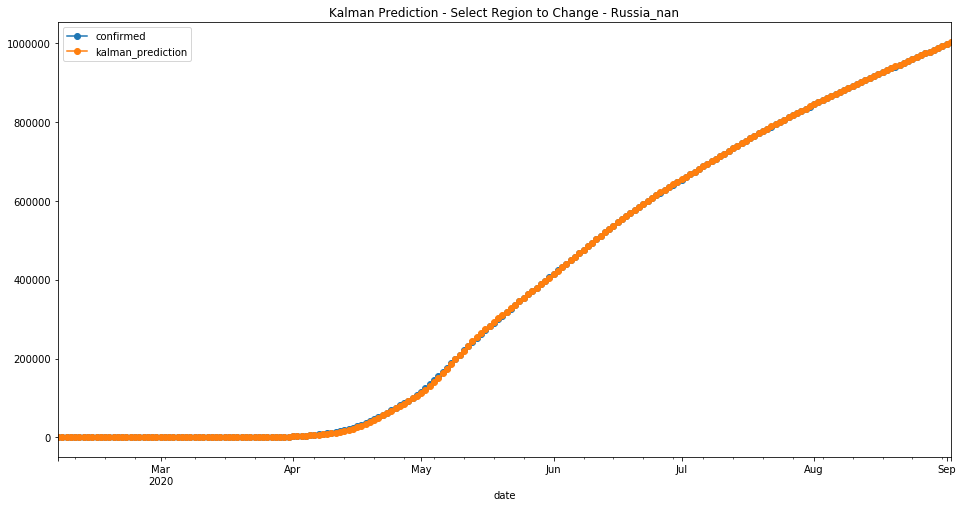

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  7.620270e+10  276048.358115  26061.492823


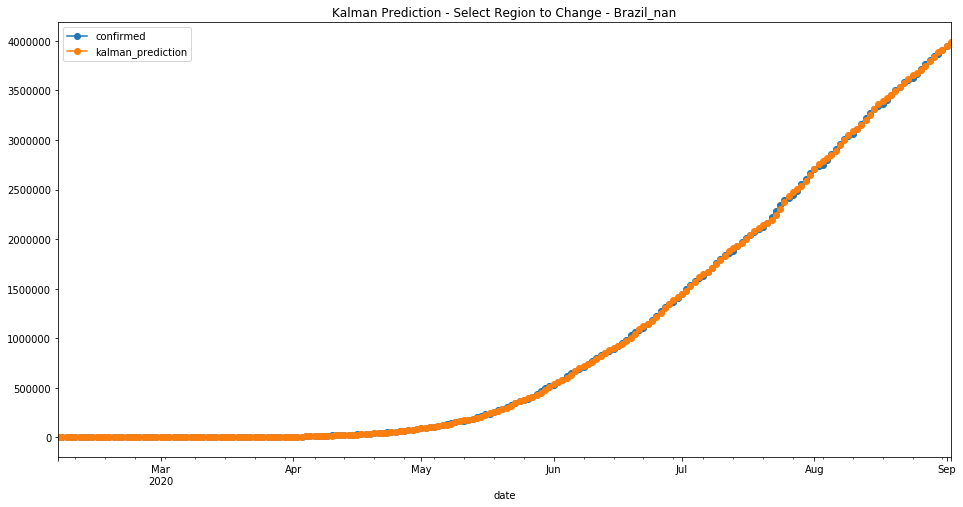

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  5.487063e+08  23424.481793  2096.344498


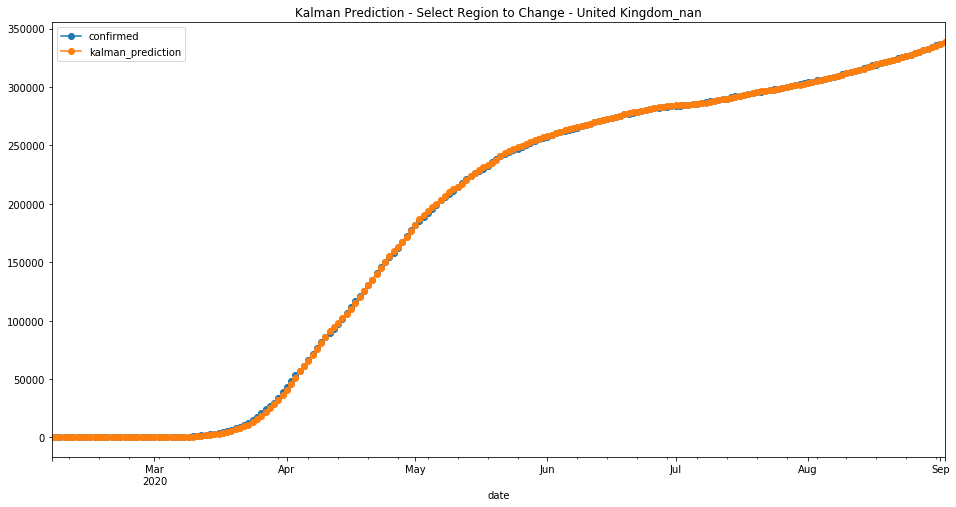

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         17 hours 37 mins
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 10 months and 6 days !!!
H2O cluster name:           H2O_from_python_unknownUser_ef2nkz
H2O cluster total nodes:    1
H2O cluster free memory:    3.999 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-28
last_train_date= 2020-09-01
first_bootstrap_date= 2020-08-24
boost_bootstrap_date= 2020-08-29
first_test_date= 2020-08-23
last_test_date= 2020-09-02
first_valid_date= 2020-08-31


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   38041.0      38054 2020-08-24  Afghanistan_nan
1   38108.0      38070 2020-08-25  Afghanistan_nan
2   38130.0      38113 2020-08-26  Afghanistan_nan
3   38200.0      38129 2020-08-27  Afghanistan_nan
4   38141.0      38140 2020-08-28  Afghanistan_nan
5   38148.0      38143 2020-08-29  Afghanistan_nan
6   38148.0      38162 2020-08-30  Afghanistan_nan
7   38171.0      38165 2020-08-31  Afghanistan_nan
8   38161.0      38196 2020-09-01  Afghanistan_nan
9   38204.0          0 2020-09-02  Afghanistan_nan
10   8577.0       8605 2020-08-24      Albania_nan
11   8774.0       8759 2020-08-25      Albania_nan
12   8920.0       8927 2020-08-26      Albania_nan
13   9086.0       9083 2020-08-27      Albania_nan
14   9242.0       9195 2020-08-28      Albania_nan
15   9335.0       9279 2020-08-29      Albania_nan
16   9405.0       9380 2020-08-30      Albania_nan
17   9514.0       9513 2020-08-31      Albania_nan
18   9649.0       9606 2020-09-01      Albania_nan
19   9718.0          0 2020-09-02      Albania_nan
20  41896.0      41858 2020-08-24      Algeria_nan
21  42290.0      42228 2020-08-25      Algeria_nan
22  42648.0      42619 2020-08-26      Algeria_nan
23  43046.0      43016 2020-08-27      Algeria_nan
24  43446.0      43403 2020-08-28      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  36113.0      36174 2020-08-29  Azerbaijan_nan
176  36310.0      36309 2020-08-30  Azerbaijan_nan
177  36421.0      36435 2020-08-31  Azerbaijan_nan
178  36535.0      36578 2020-09-01  Azerbaijan_nan
179  36699.0          0 2020-09-02  Azerbaijan_nan
180   1829.0       1765 2020-08-24     Bahamas_nan
181   1837.0       1765 2020-08-25     Bahamas_nan
182   1810.0       1765 2020-08-26     Bahamas_nan
183   1800.0       1765 2020-08-27     Bahamas_nan
184   1786.0       2057 2020-08-28     Bahamas_nan
185   2177.0       2135 2020-08-29     Bahamas_nan
186   2208.0       2167 2020-08-30     Bahamas_nan
187   2173.0       2217 2020-08-31     Bahamas_nan
188   2285.0       2276 2020-09-01     Bahamas_nan
189   2367.0          0 2020-09-02     Bahamas_nan
190  49598.0      49719 2020-08-24     Bahrain_nan
191  50025.0      50076 2020-08-25     Bahrain_nan
192  50373.0      50393 2020-08-26     Bahrain_nan
193  50654.0      50756 2020-08-27     Bahrain_nan
194  51041.0      51113 2020-08-28     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  70535.0      70645 2020-08-24  Belarus_nan
221  70730.0      70727 2020-08-25  Belarus_nan
222  70791.0      70974 2020-08-26  Belarus_nan
223  71104.0      71165 2020-08-27  Belarus_nan
224  71294.0      71346 2020-08-28  Belarus_nan
225  71444.0      71523 2020-08-29  Belarus_nan
226  71630.0      71687 2020-08-30  Belarus_nan
227  71785.0      71843 2020-08-31  Belarus_nan
228  71935.0      71962 2020-09-01  Belarus_nan
229  72072.0          0 2020-09-02  Belarus_nan
230  82334.0      82092 2020-08-24  Belgium_nan
231  82491.0      82447 2020-08-25  Belgium_nan
232  82961.0      83030 2020-08-26  Belgium_nan
233  83644.0      83500 2020-08-27  Belgium_nan
234  83971.0      83952 2020-08-28  Belgium_nan
235  84308.0      84599 2020-08-29  Belgium_nan
236  85025.0      85042 2020-08-30  Belgium_nan
237  85401.0      85236 2020-08-31  Belgium_nan
238  85567.0      85487 2020-09-01  Belgium_nan
239  85888.0          0 2020-09-02  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  18959420.17841774
# MSE on the validation data =  609948258277.8817
# R^2 on the training data =  0.9999508118381385
# R^2 on the validation data =  0.452572244152891


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1598966354727_6


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18959420.17841774
RMSE: 4354.241630688143
MAE: 935.4931863960179
RMSLE: 0.277259269522094
Mean Residual Deviance: 18959420.17841774

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 609948258277.8817
RMSE: 780991.8426449035
MAE: 181035.79983798822
RMSLE: 6.574243680473283
Mean Residual Deviance: 609948258277.8817
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-09-02 06:57:05  0.009 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2020-09-02 06:57:05  0.079 sec   1.0                18502.093542799525  3853.4917655420577  342327465.4665038    785232.0077452686  179750.15195664414  616589305987.6656
     2020-09-02 06:57:05  0.124 sec   2.0                18751.451854388273  3368.1878989259544  351616946.6474414    783954.4334347004  179008.500172658    614584553701.922
     2020-09-02 06:57:05  0.185 sec   3.0                20819.18553565707   3235.6638434812216  433438486.3681125    788184.0054598536  180587.19756255284  621234026462.7384
     2020-09-02 06:57:05  0.274 sec   4.0                18661.683221490104  3037.1790870920295  348258420.6592453    785090.8222831773  180454.07718197934  616367599233.2754
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2020-09-02 06:57:17  12.036 sec  247.0              4867.079068177883   1022.592716113449   23688458.655895285   781336.1487619819  181518.71084679206  610486177362.2059
     2020-09-02 06:57:21  16.074 sec  336.0              4693.9971250618455  1003.9134674019291  22033609.010088872   781427.4766170757  181444.9059013726   610628901212.1304
     2020-09-02 06:57:25  20.098 sec  426.0              4632.9617362988265  975.7368482609174   21464334.450009033   781353.4596650855  181033.34917612426  610513228930.5984
     2020-09-02 06:57:29  24.128 sec  496.0              4387.783802292326   939.324858603876    19252646.6956589     781017.0381439222  181064.3835258843   609987613871.1049
     2020-09-02 06:57:30  24.663 sec  500.0              4354.241630688143   935.4931863960179   18959420.17841774    780991.8426449035  181035.79983798822  609948258277.8817


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  5.3274e+17             1                    0.371071
last_day           4.01292e+17            0.75326              0.279513
7_day_change       2.22569e+17            0.417782             0.155027
3_day_change       1.29358e+17            0.242817             0.0901024
1_day_change       7.28252e+16            0.136699             0.0507252
infected_rate      3.09301e+16            0.0580585            0.0215438
region             2.78644e+16            0.0523039            0.0194085
max                5.0333e+15             0.00944794           0.00350586
min                4.07711e+15            0.0076531            0.00283984
1_day_change_rate  3.54947e+15            0.00666266           0.00247232
7_day_change_rate  2.85924e+15            0.00536703           0.00199155
3_day_change_rate  2.58367e+15            0.00484977           0.00179961

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         5.327403e+17           1.000000    0.371071
1            last_day         4.012919e+17           0.753260    0.279513
2        7_day_change         2.225693e+17           0.417782    0.155027
3        3_day_change         1.293584e+17           0.242817    0.090102
4        1_day_change         7.282522e+16           0.136699    0.050725
5       infected_rate         3.093009e+16           0.058058    0.021544
6              region         2.786439e+16           0.052304    0.019408
7                 max         5.033297e+15           0.009448    0.003506
8                 min         4.077114e+15           0.007653    0.002840
9   1_day_change_rate         3.549468e+15           0.006663    0.002472
10  7_day_change_rate         2.859235e+15           0.005367    0.001992
11  3_day_change_rate         2.583667e+15           0.004850    0.001800

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


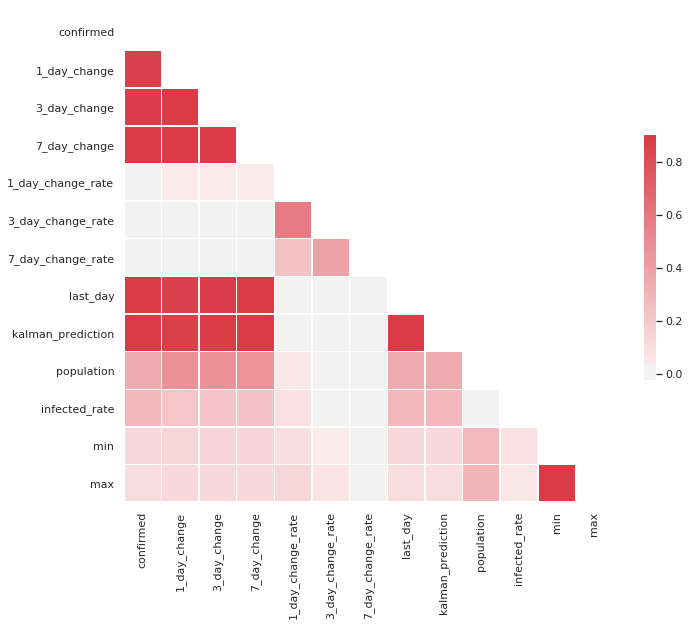

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.867443
3_day_change         0.882790
7_day_change         0.895720
1_day_change_rate    0.033791
3_day_change_rate    0.007046
7_day_change_rate   -0.009055
last_day             0.985872
kalman_prediction    0.985988
population           0.345041
infected_rate        0.286082
min                  0.125550
max                  0.109158
Name: confirmed, dtype: float64


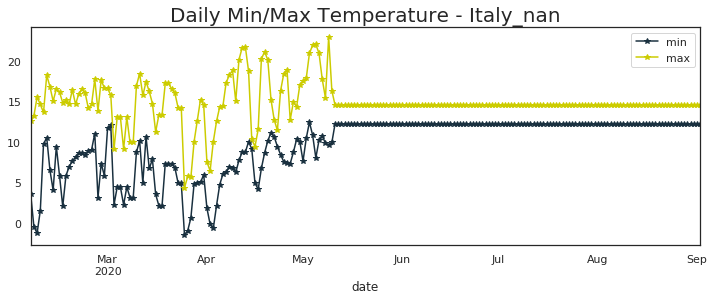

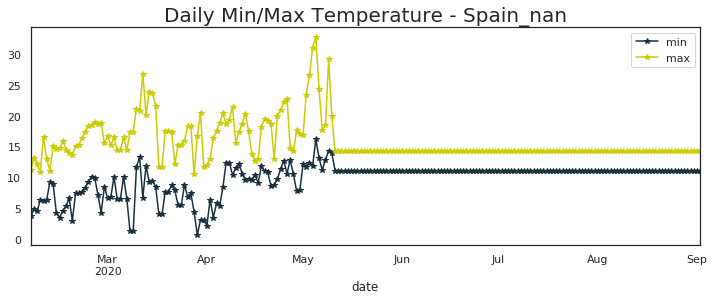

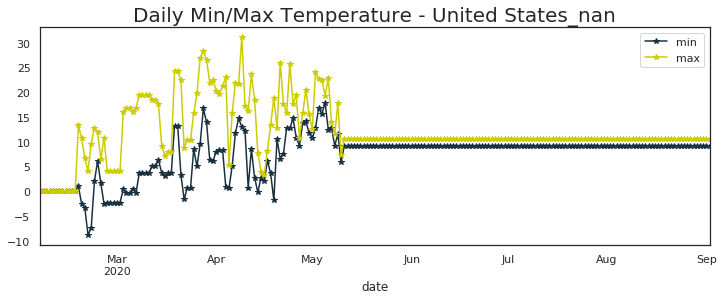

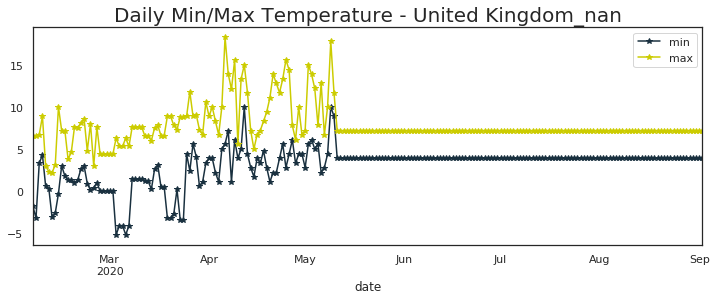

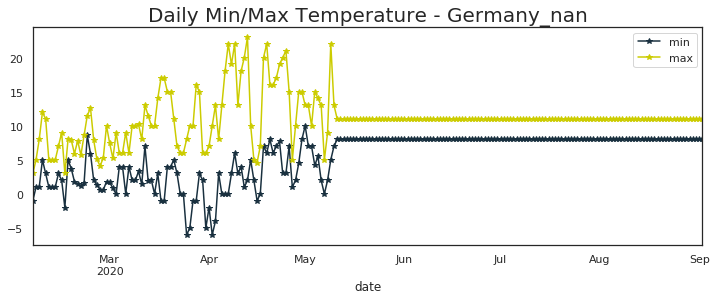

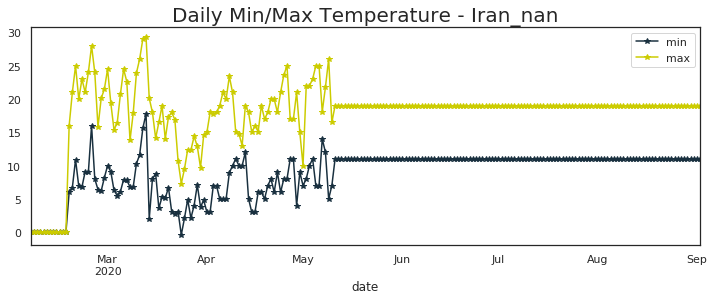

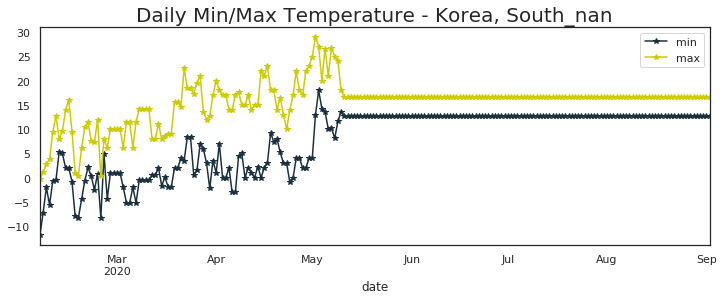

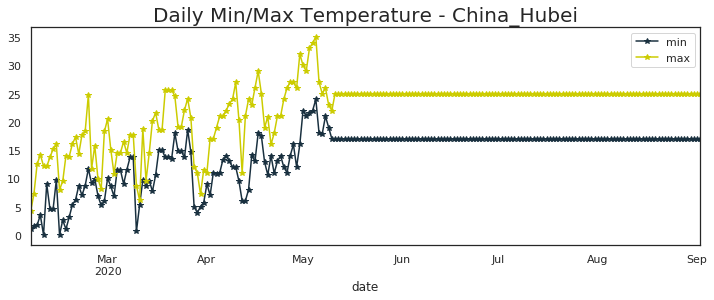

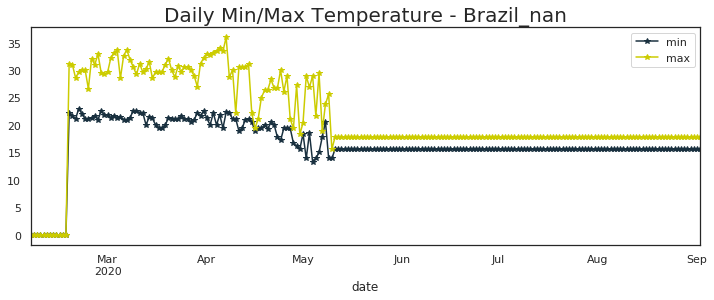

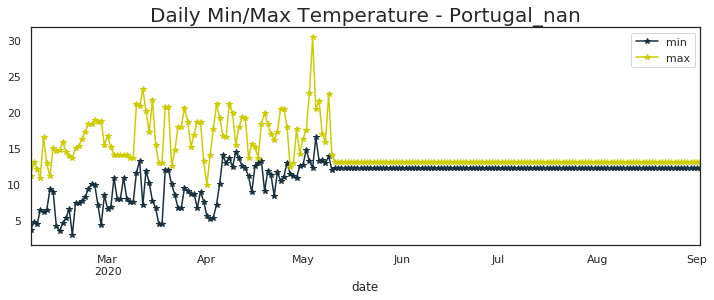

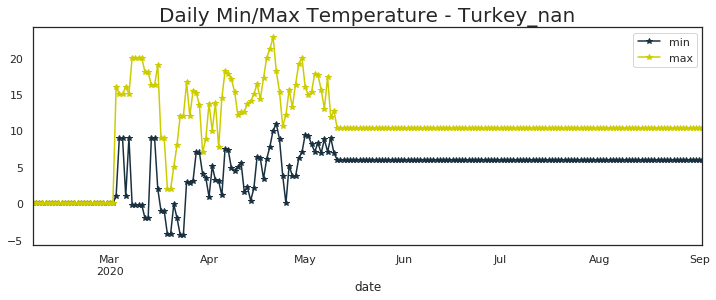

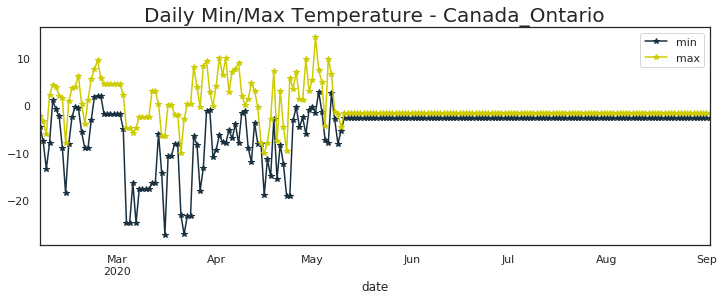

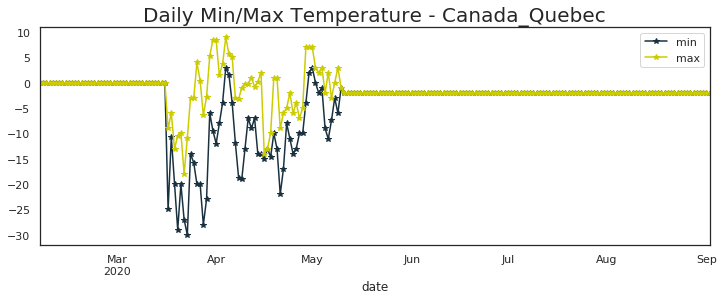

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
India_nan                   30.0  43.0
Russia_nan                  13.0  30.0
Peru_nan                     0.0   0.0
South Africa_nan             0.0   0.0
Colombia_nan                 0.0   0.0
Mexico_nan                   0.0   0.0
Spain_nan                   16.2  32.7
Argentina_nan                0.0   0.0
Chile_nan                    0.0   0.0
Iran_nan                    17.8  29.3
United Kingdom_nan          10.0  18.3
Saudi Arabia_nan             0.0   0.0
Bangladesh_nan               0.0   0.0
France_nan                  14.2  23.8
Pakistan_nan                16.0  28.0
Turkey_nan                  10.9  22.8
Italy_nan                   12.4  22.9
Germany_nan                 10.0  23.0
Iraq_nan                    21.2  29.1
Philippines_nan             27.8  35.0
Indonesia_nan               

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

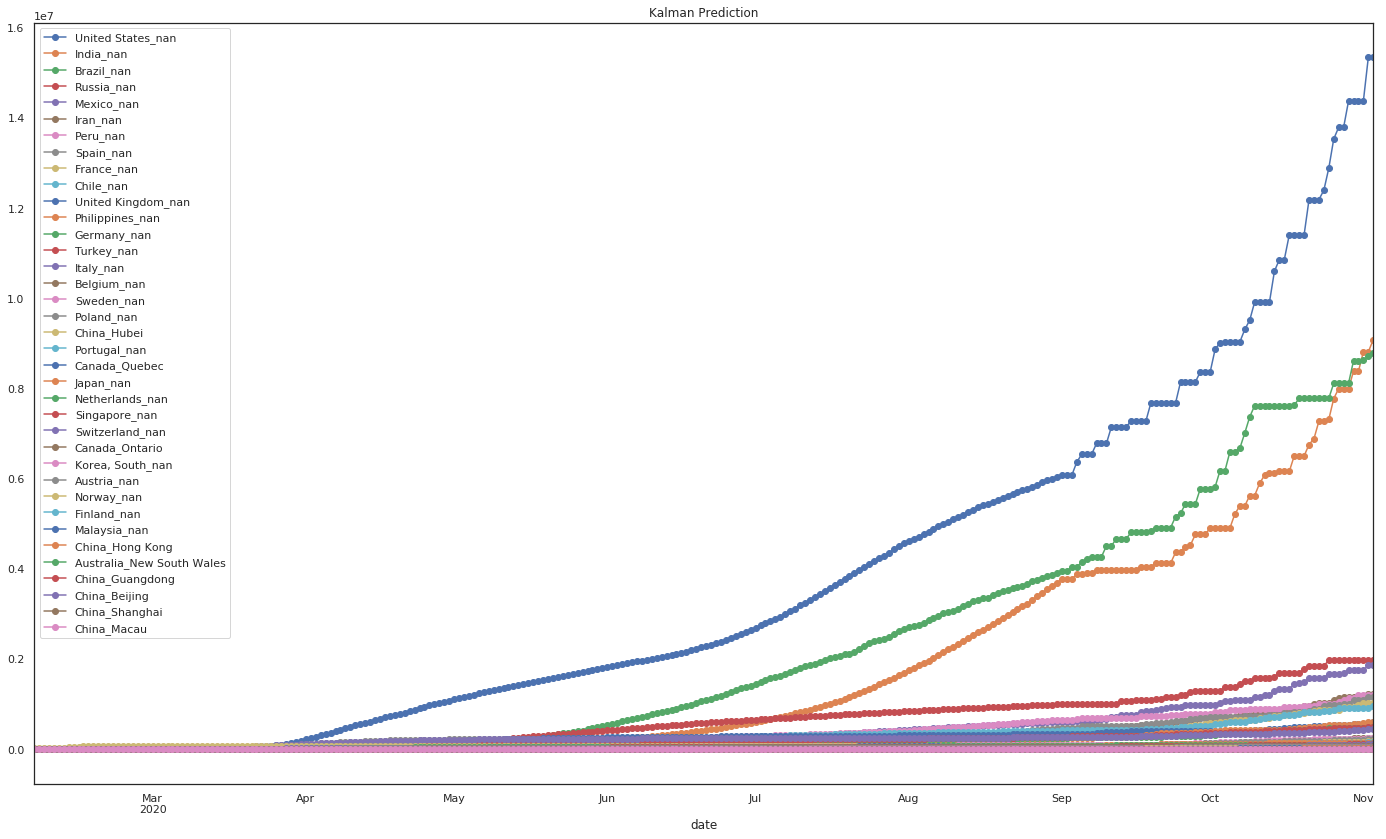

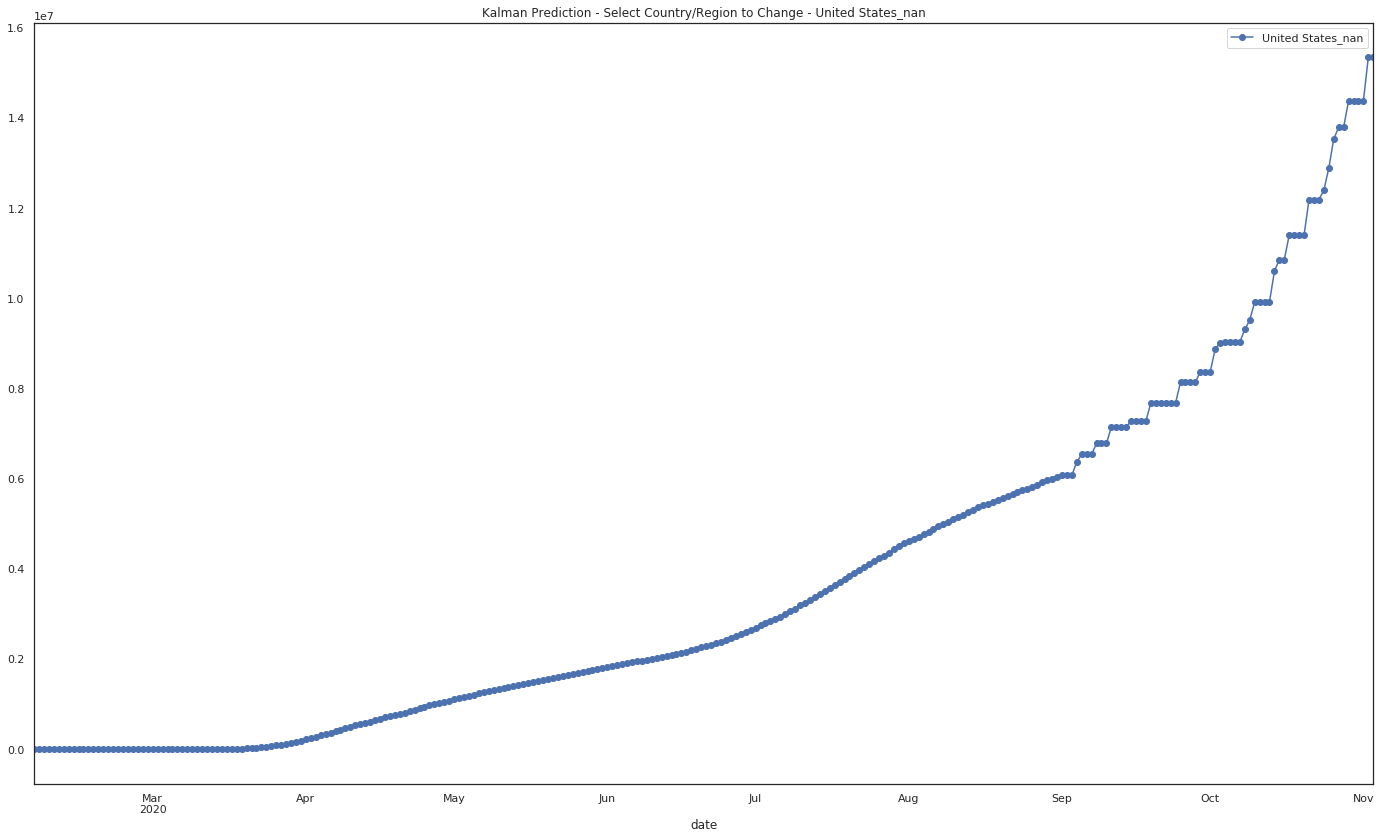

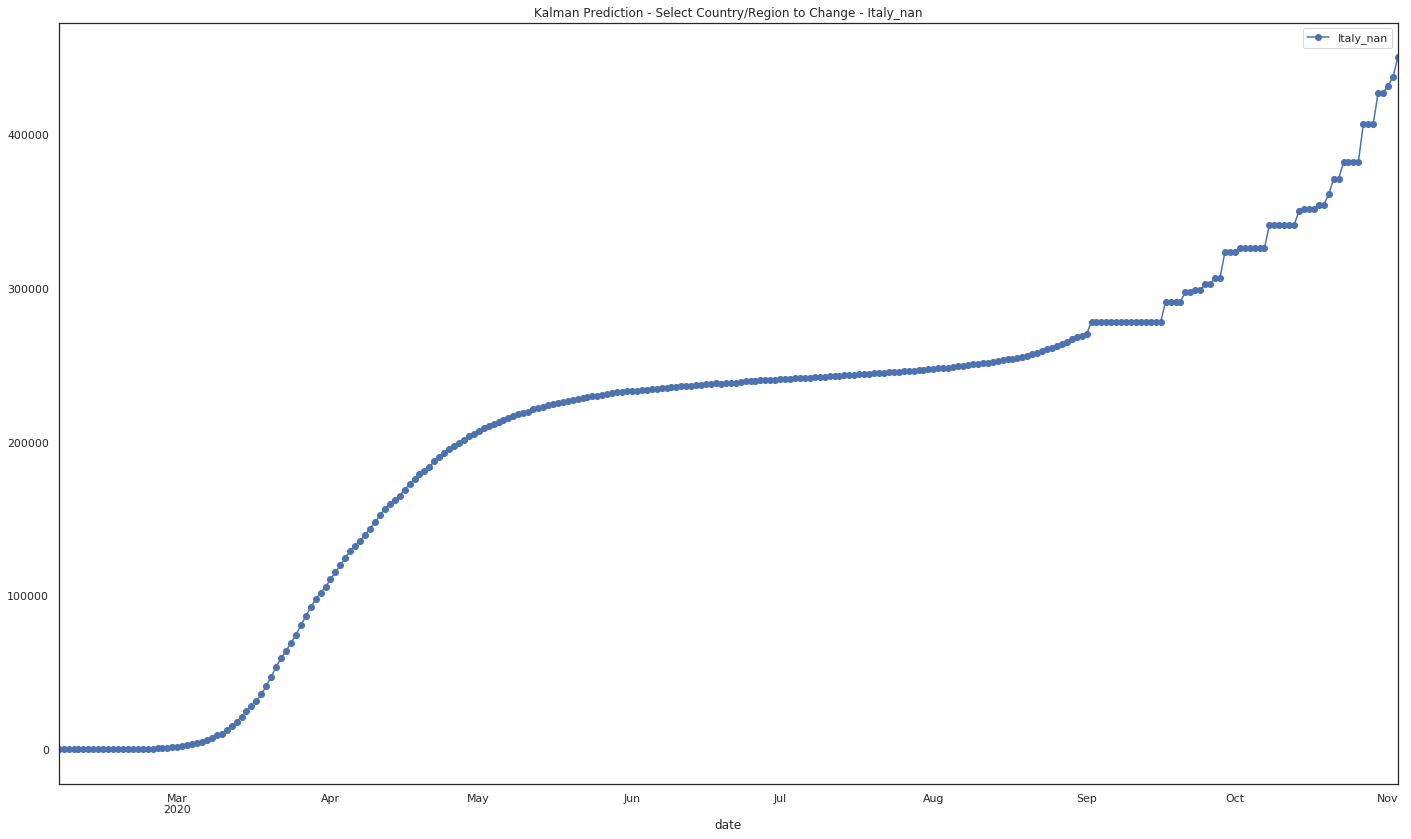

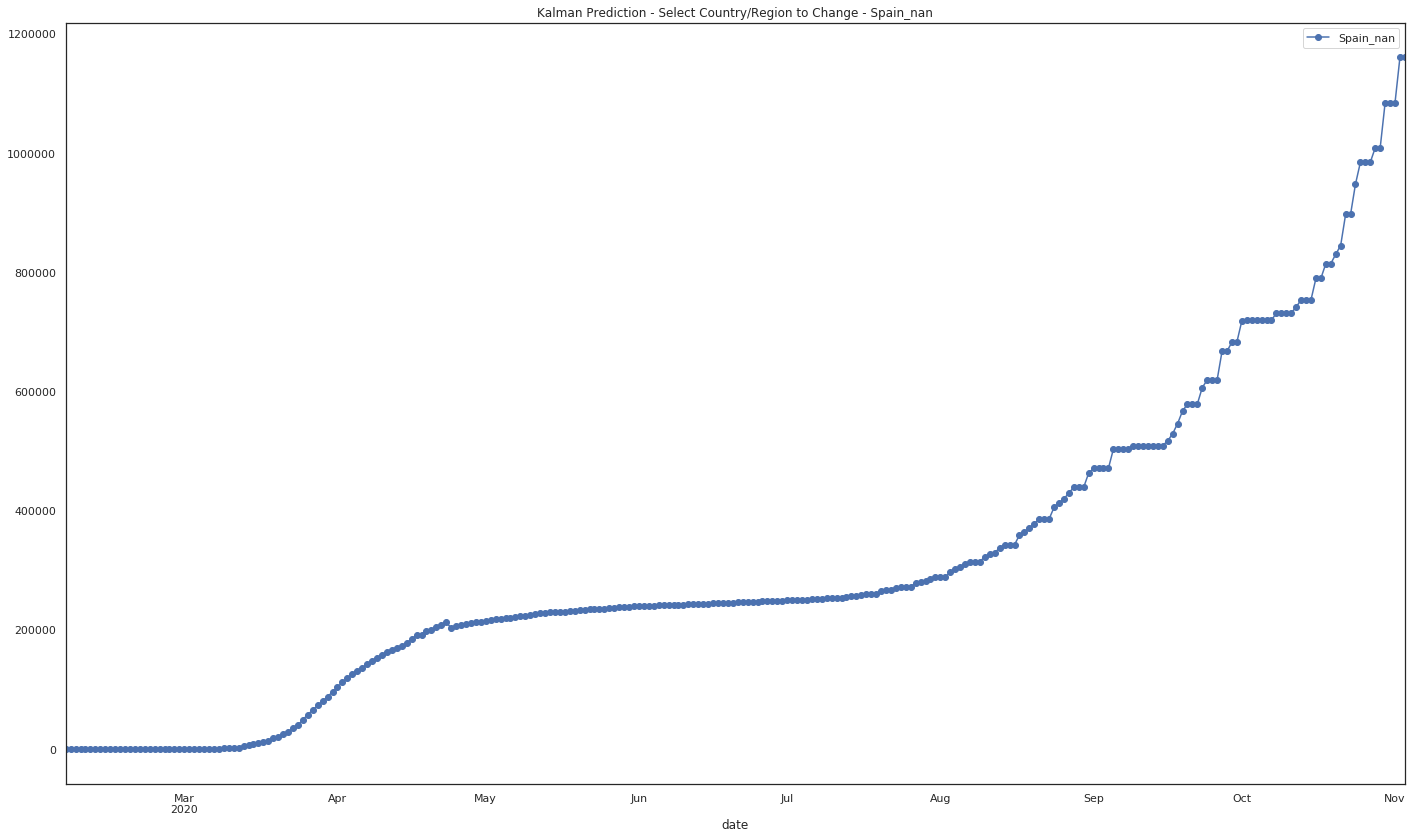

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


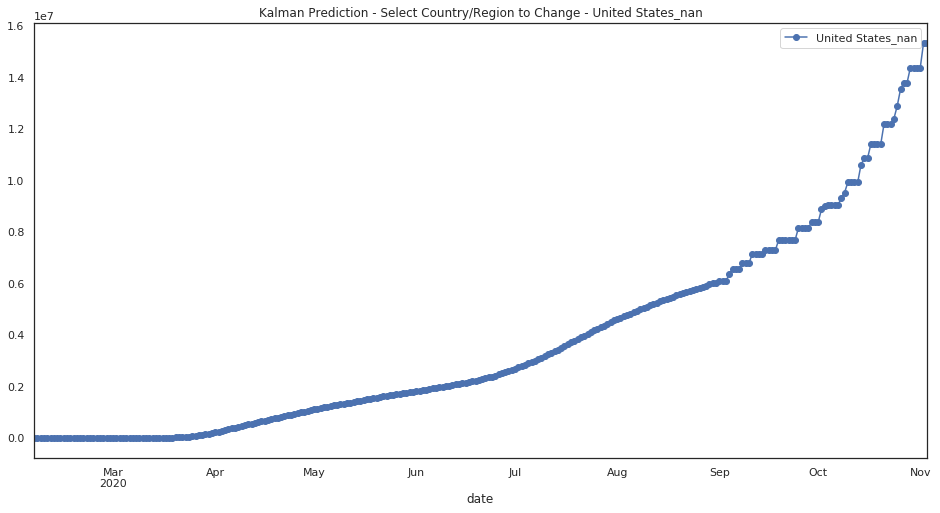

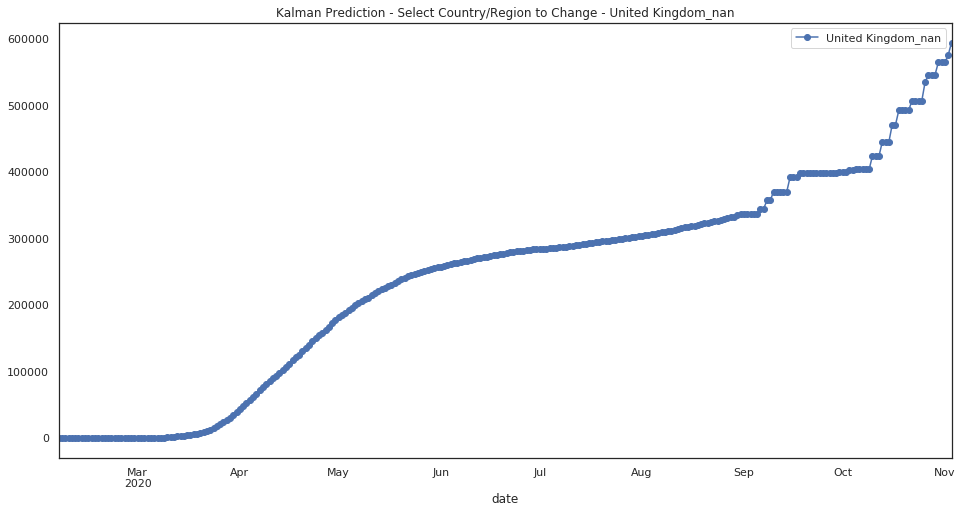

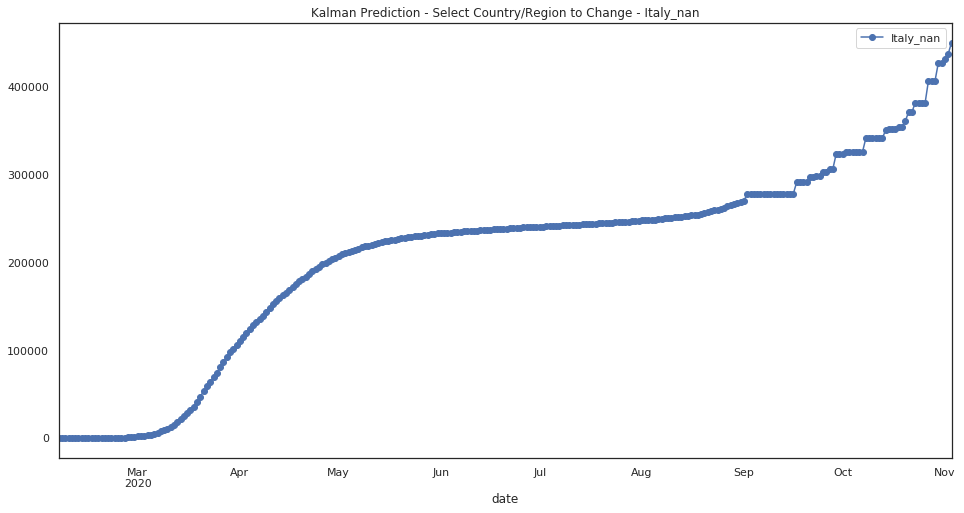

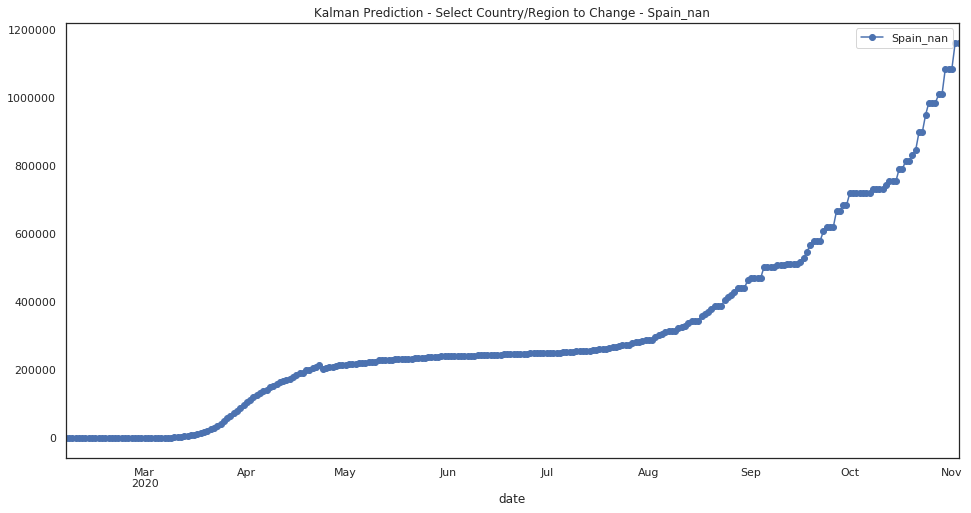

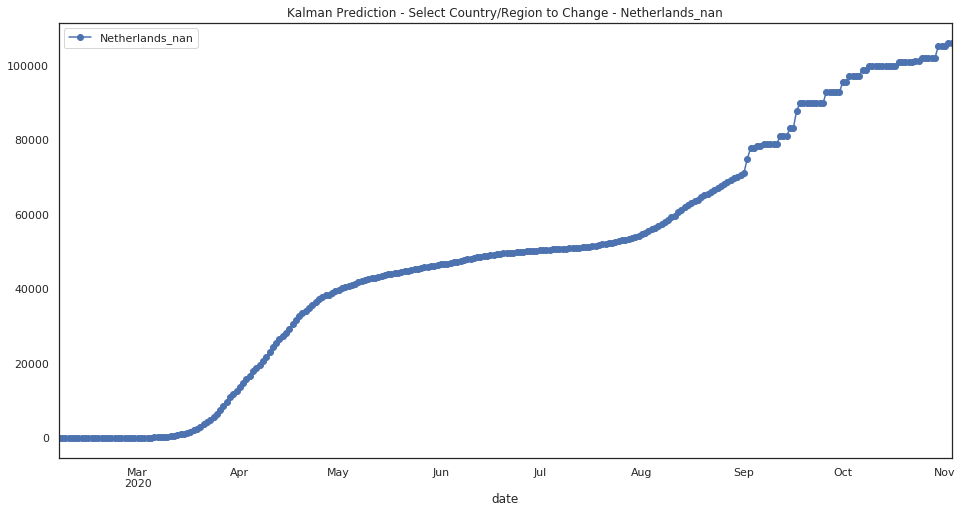

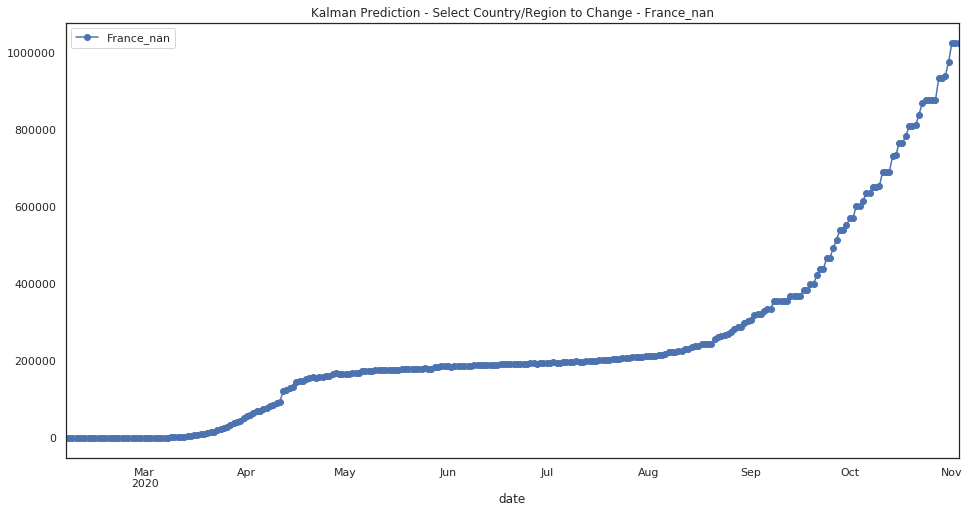

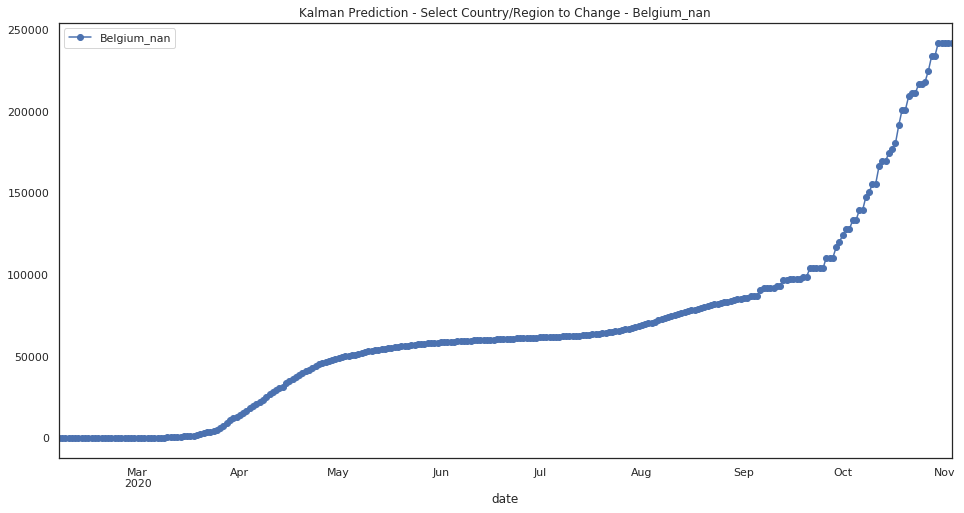

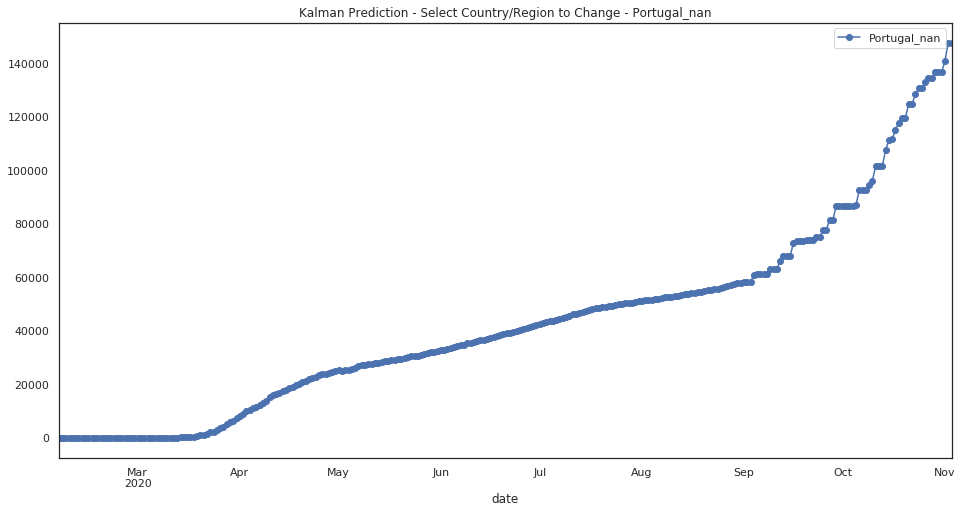

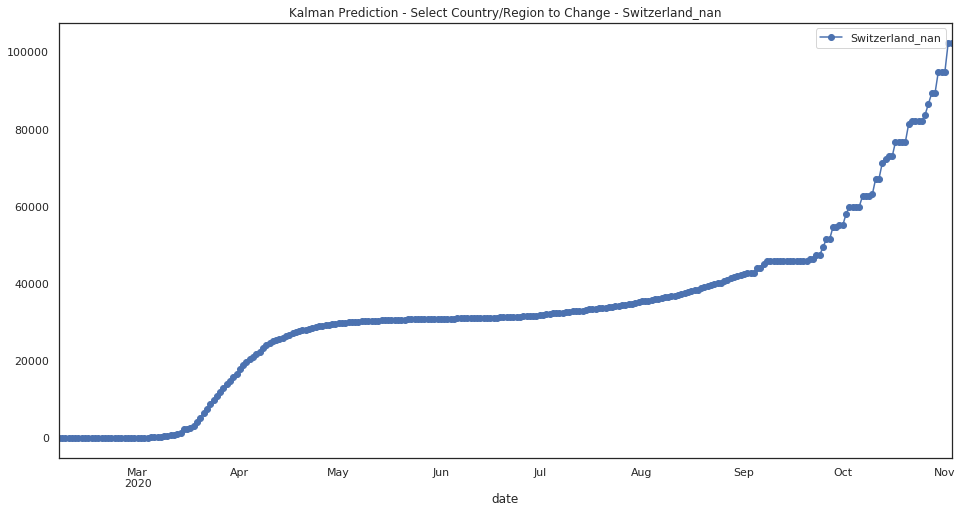

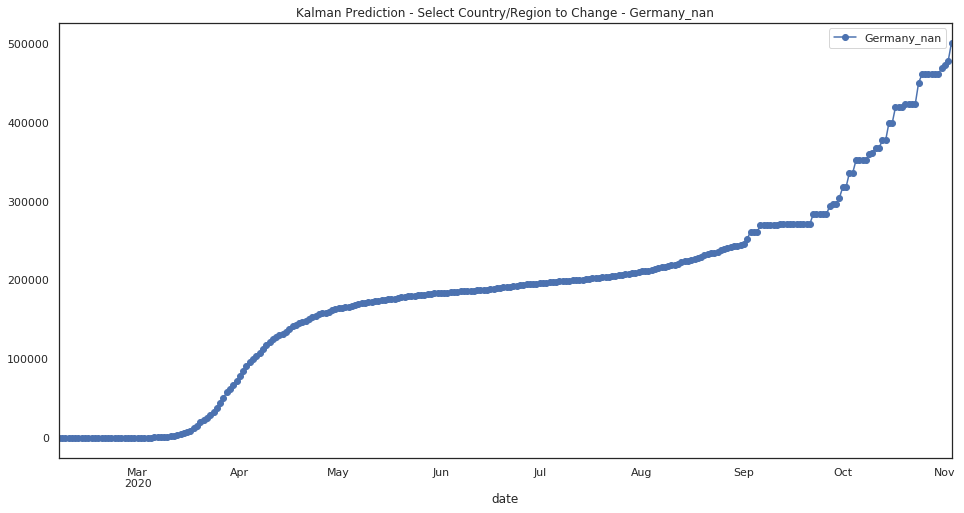

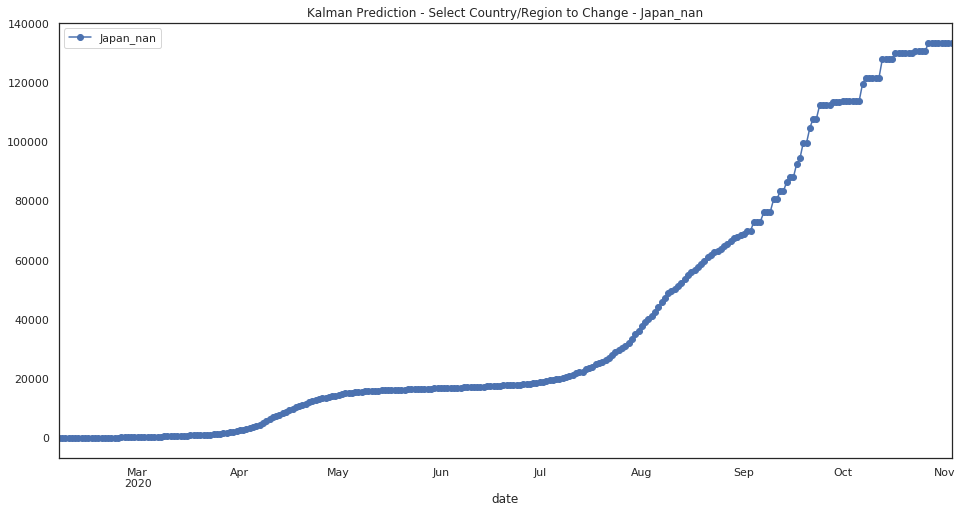

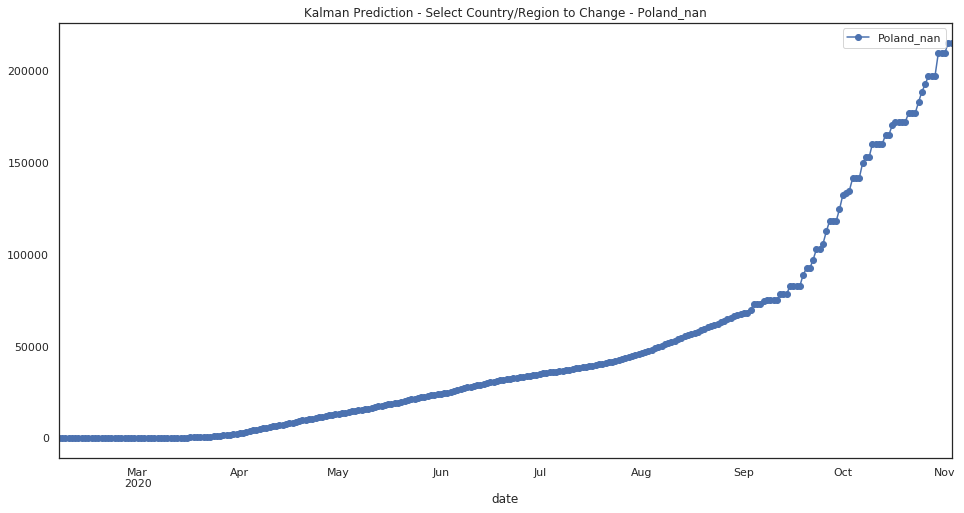

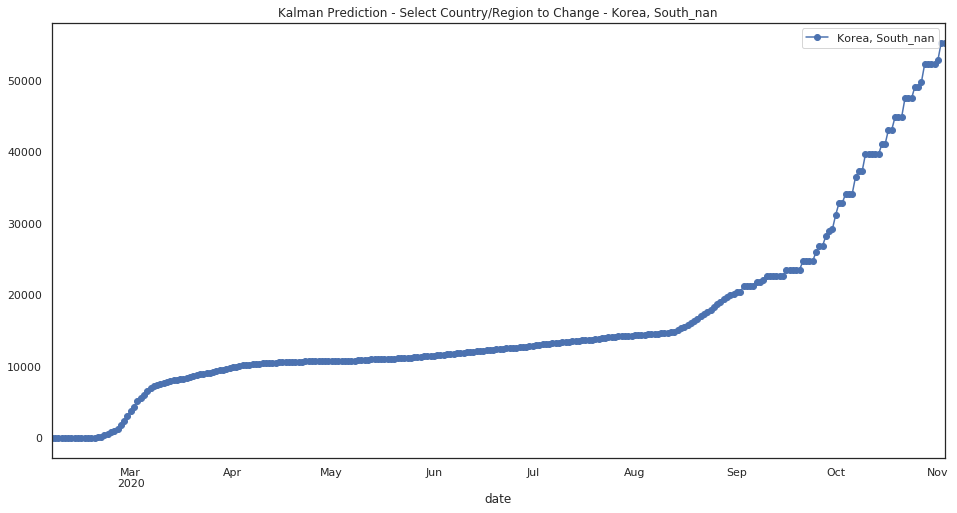

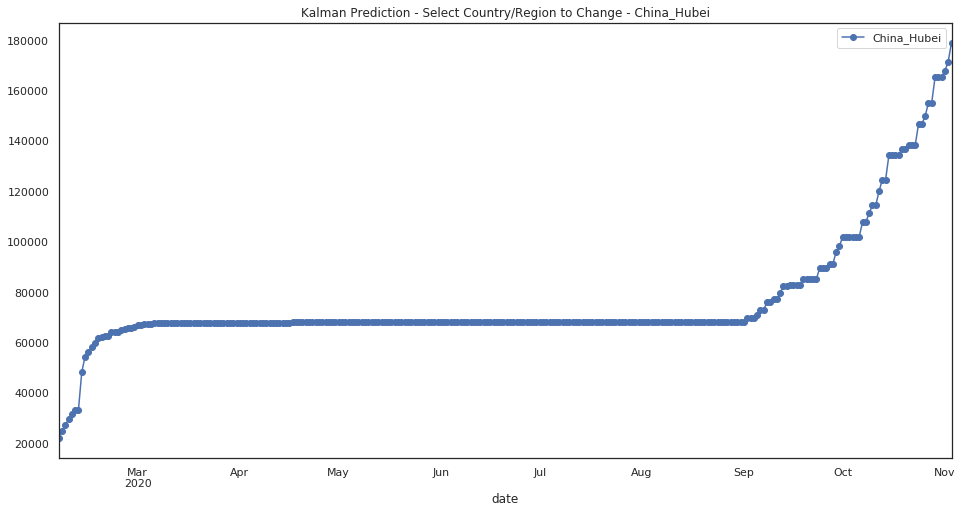

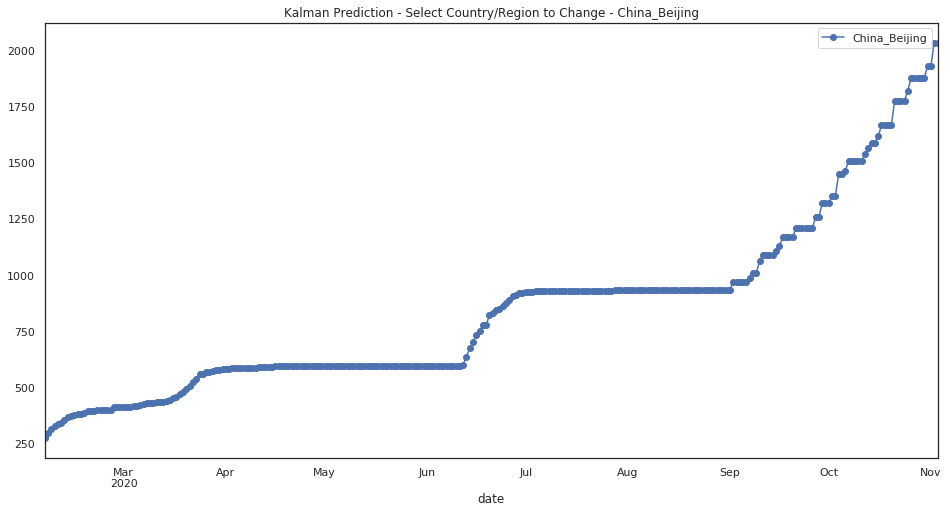

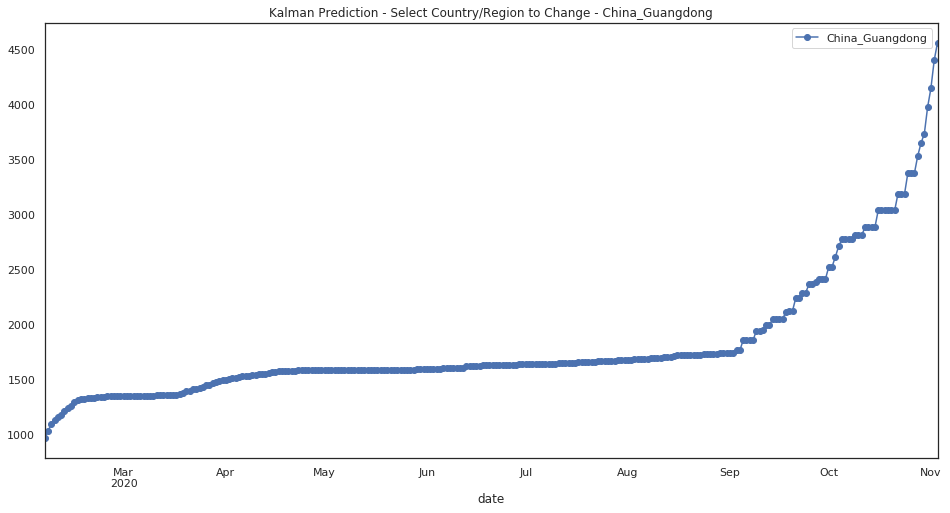

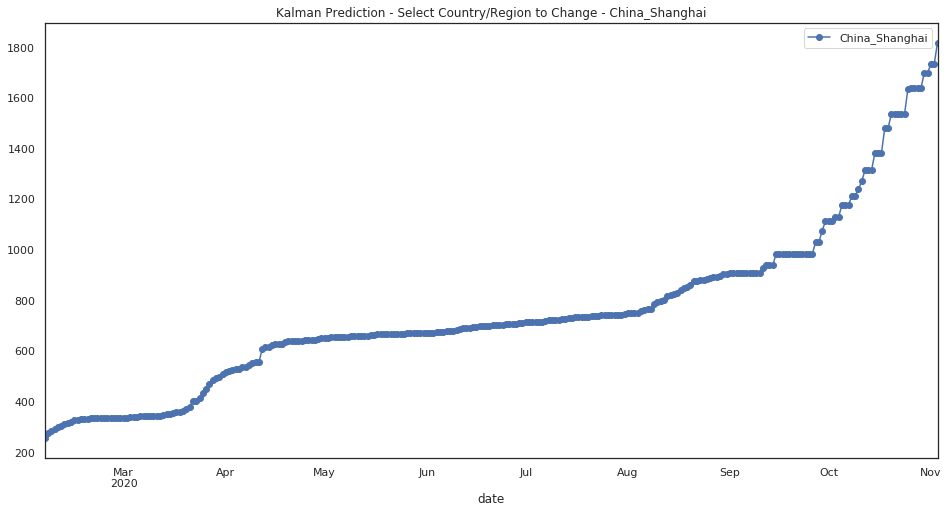

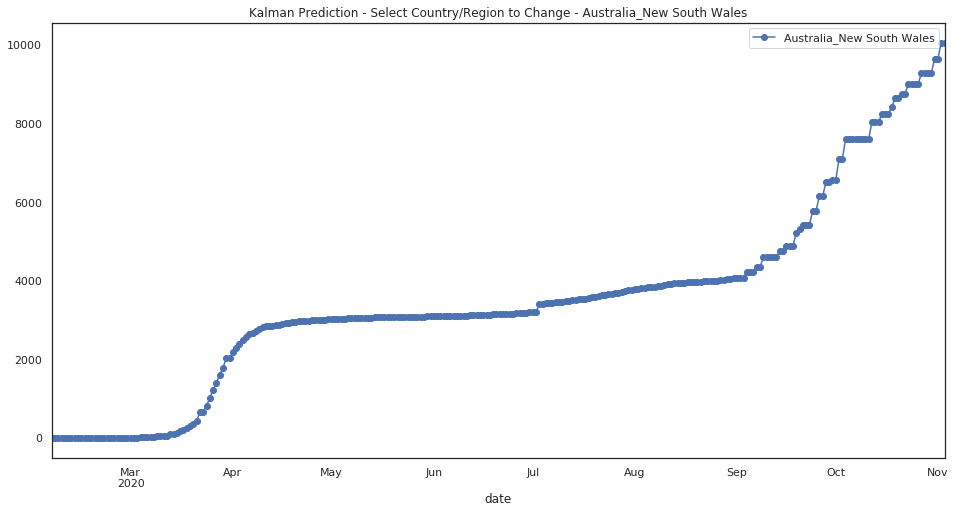

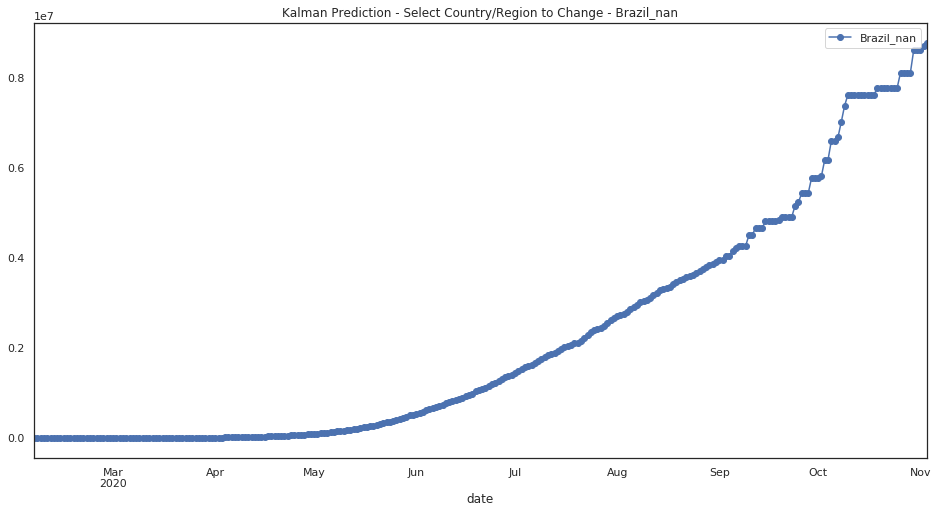

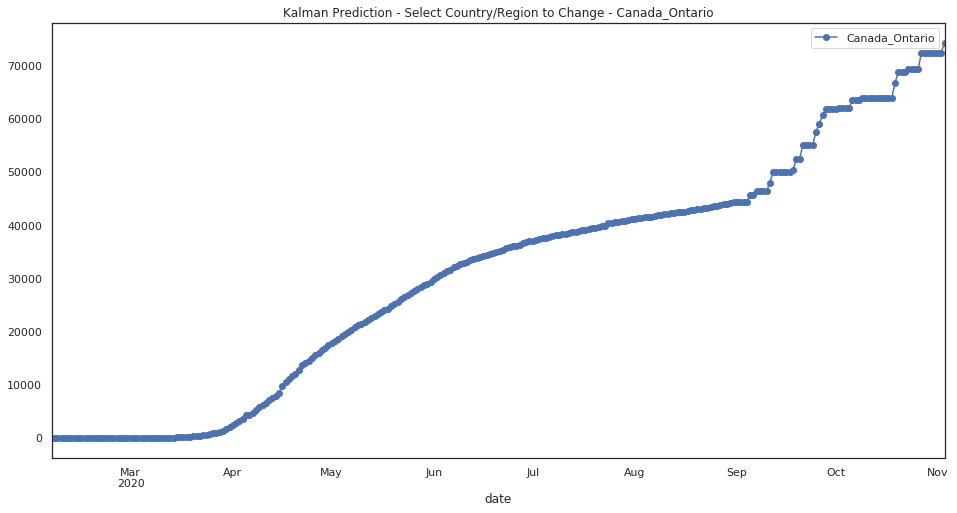

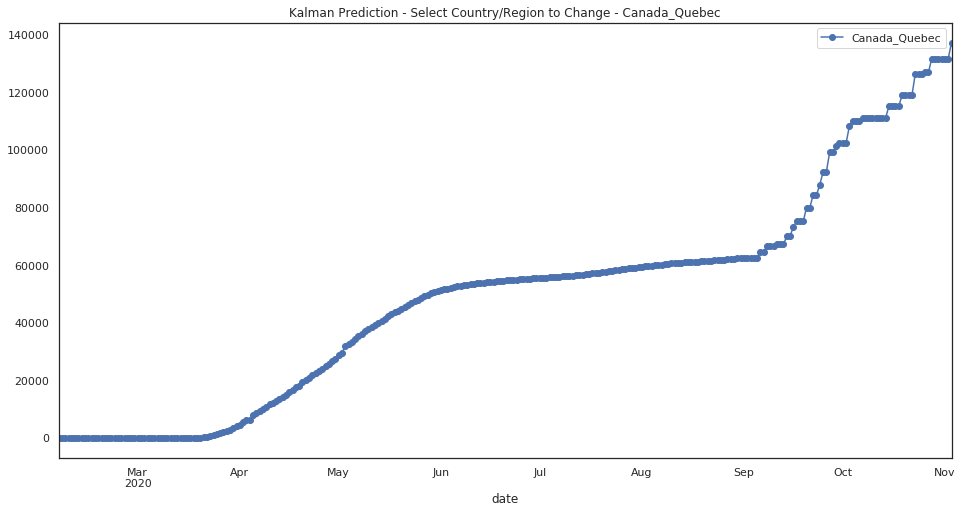

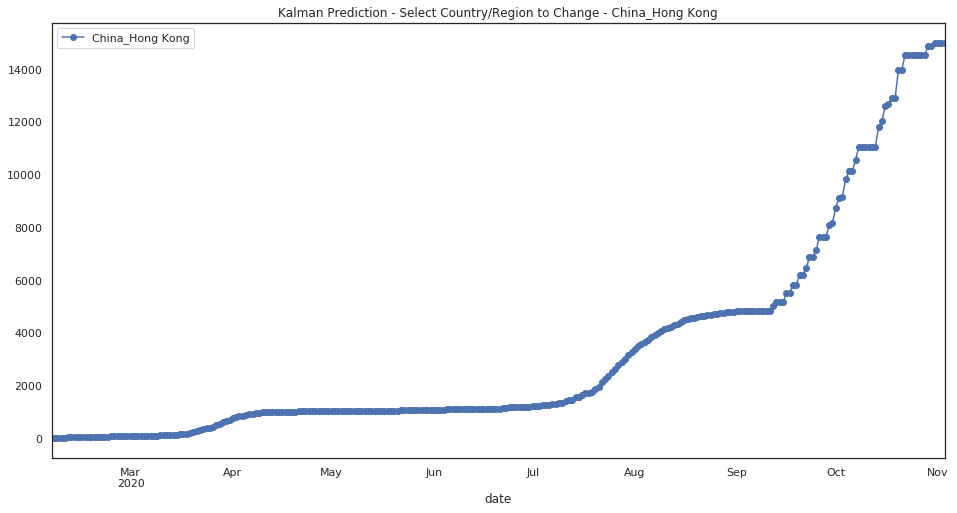

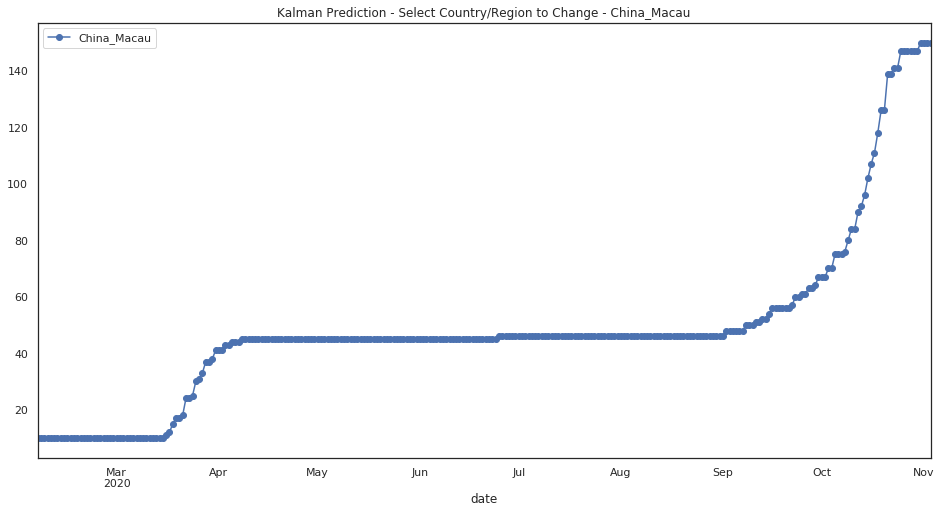

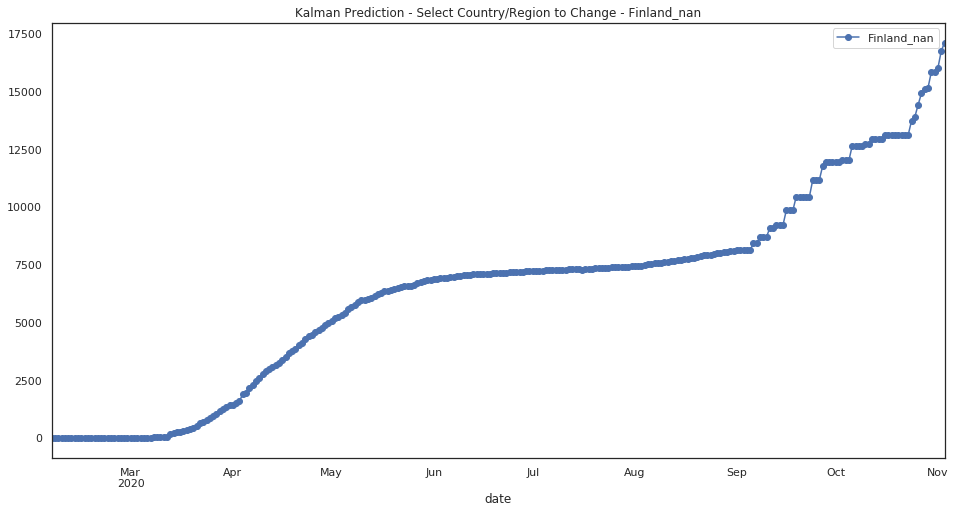

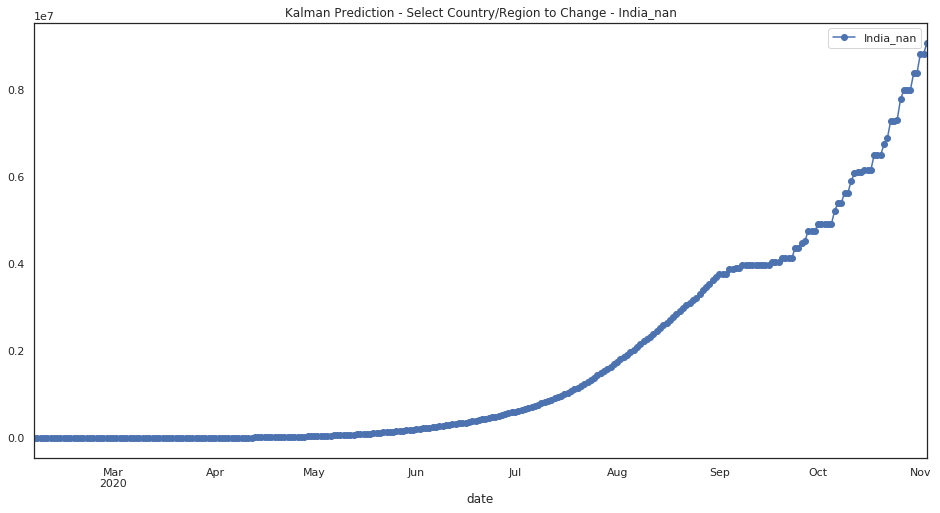

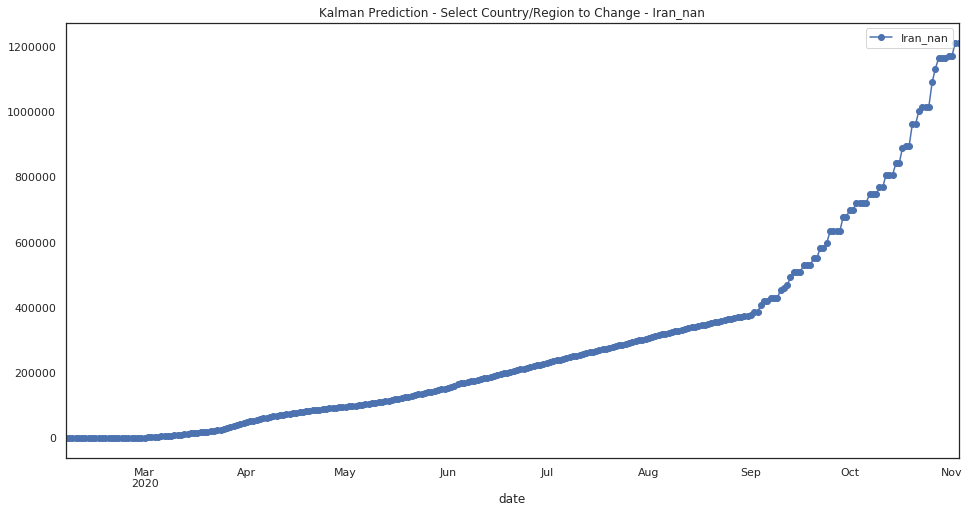

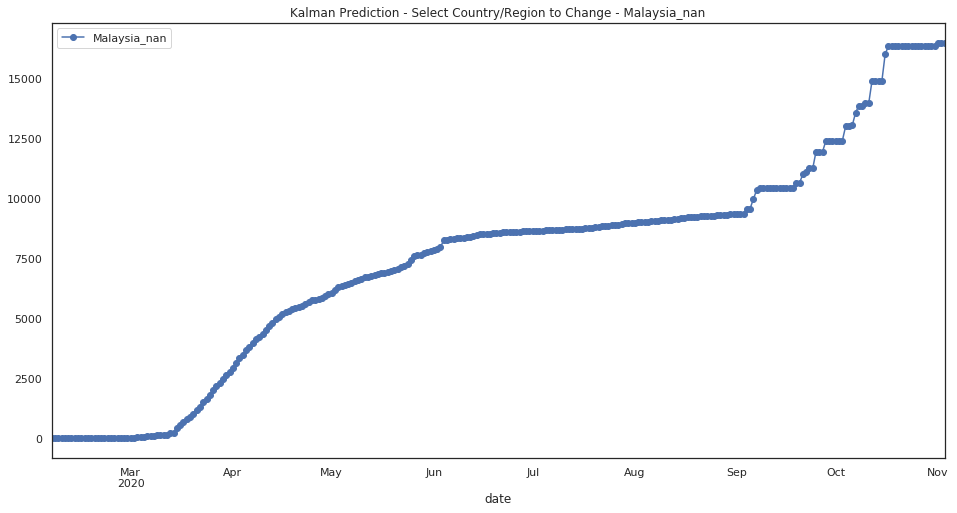

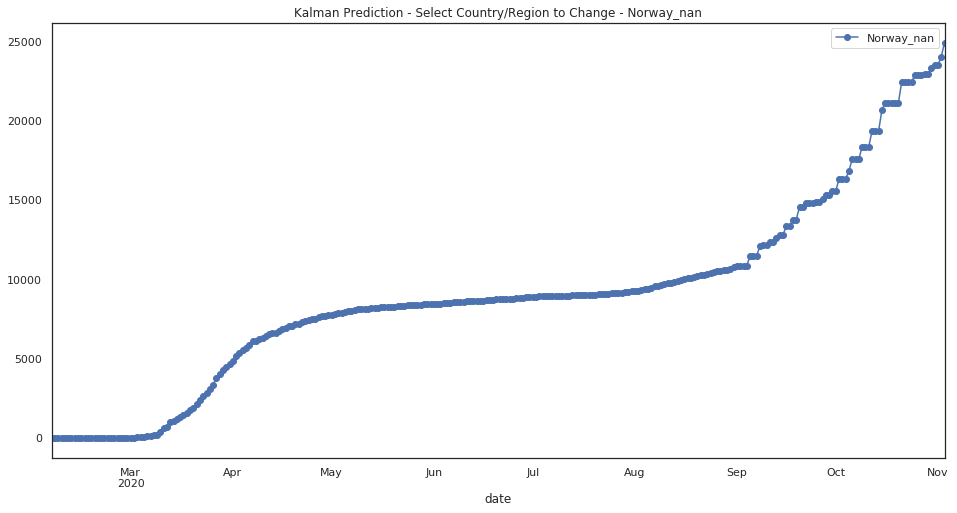

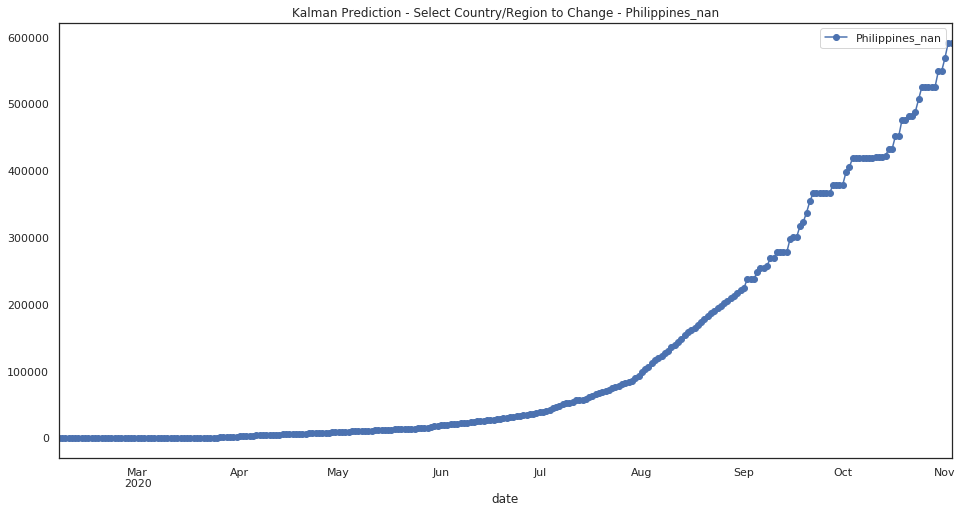

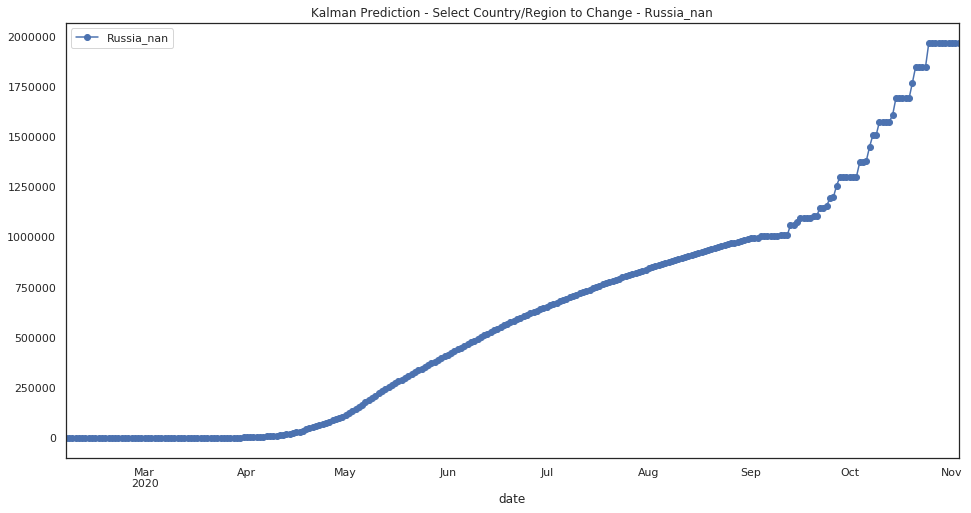

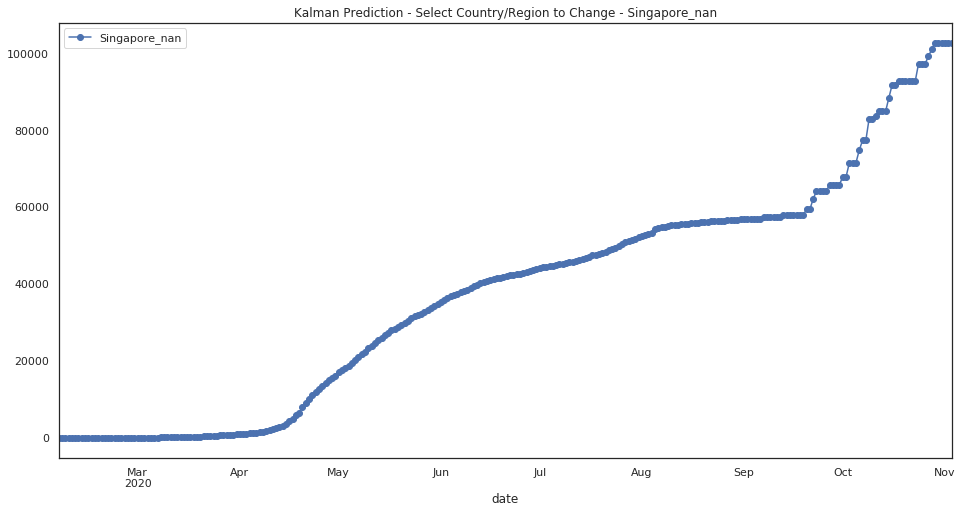

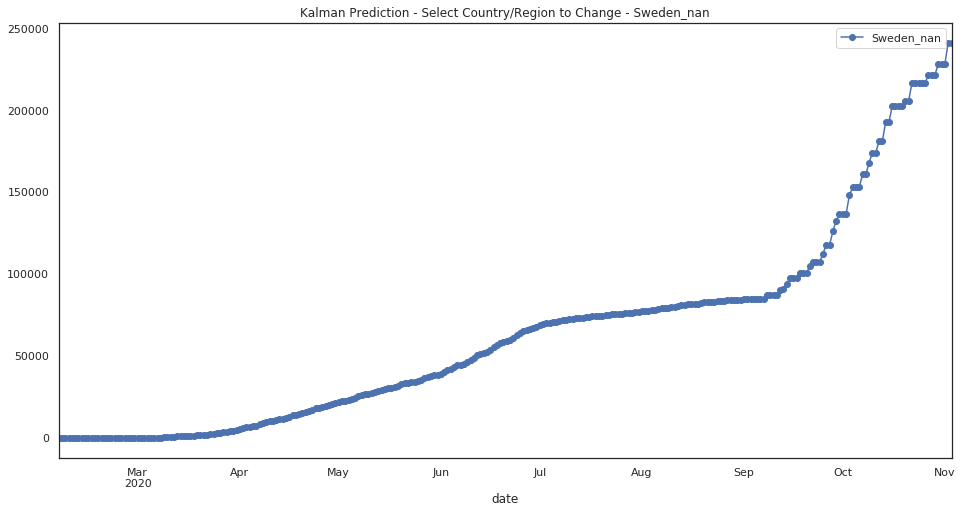

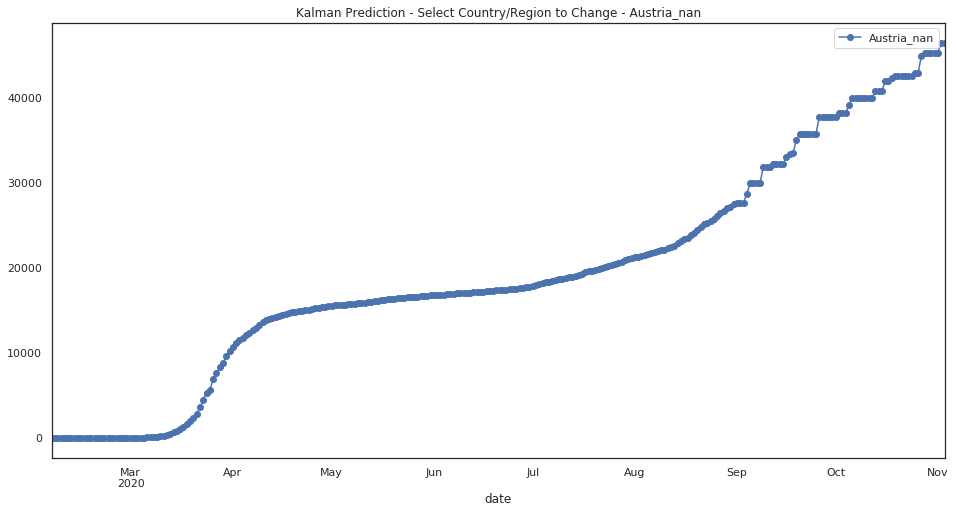

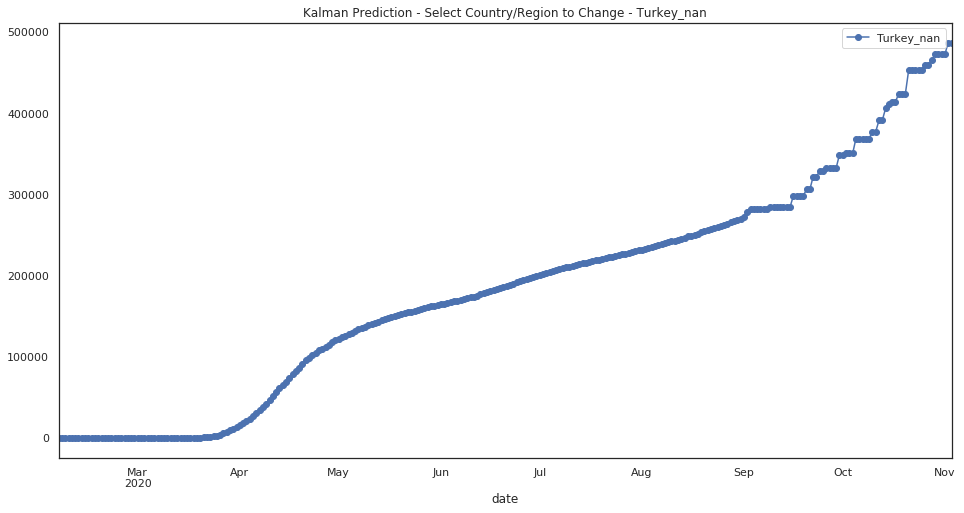

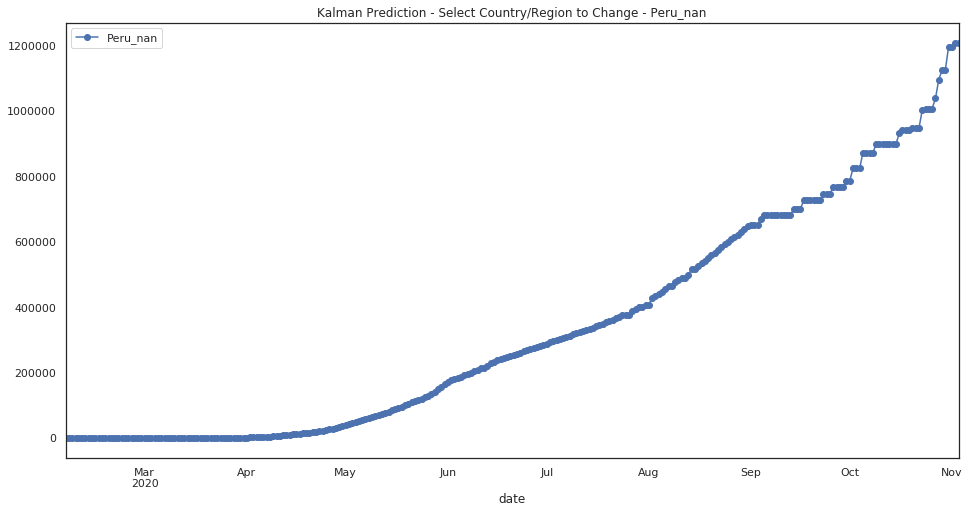

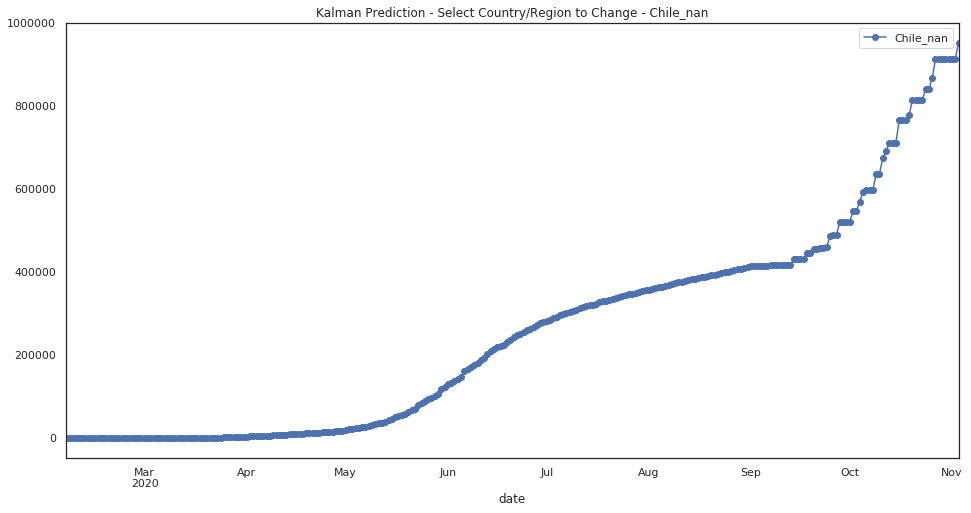

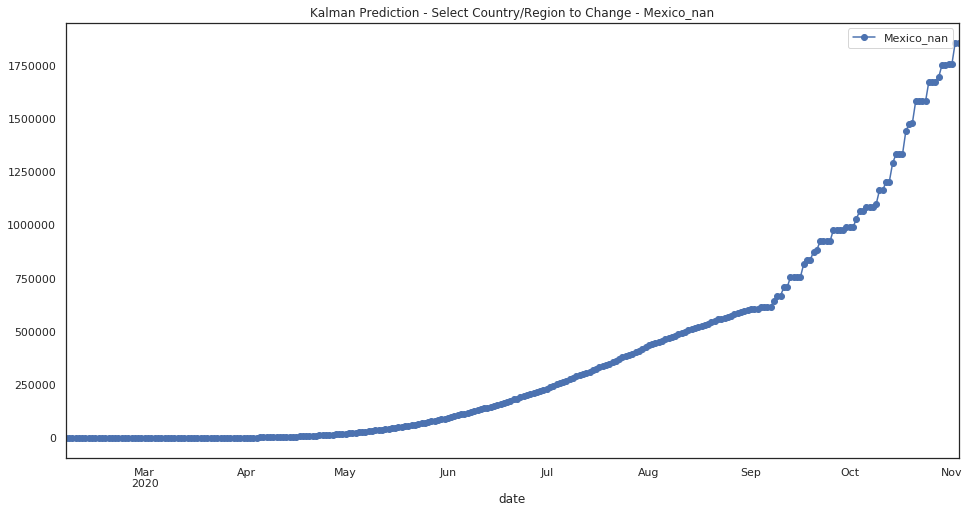

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-11-03 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN      15343385.0
India_nan                                     NaN       9080554.0
Brazil_nan                                    NaN       8779605.0
South Africa_nan                              NaN       2598028.0
Russia_nan                                    NaN       1968382.0
Mexico_nan                                    NaN       1856018.0
Iran_nan                                      NaN       1212568.0
Peru_nan                                      NaN       1209382.0
Spain_nan                                     NaN       1160670.0
Colombia_nan                                  NaN       1036187.0
France_nan                                    NaN       1025457.0
Chile_nan                                     NaN        952657.0
Argentina_nan                                 NaN        878584.0
Saudi Arabia_nan                              NaN        690435.0
United Kingdom_nan                            NaN        594148.0
Philippines_nan                               NaN        591949.0
Pakistan_nan                                  NaN        577869.0
Bangladesh_nan                                NaN        551493.0
Iraq_nan                                      NaN        524880.0
Germany_nan                                   NaN        500833.0
Turkey_nan                                    NaN        486958.0
Italy_nan                                     NaN        450557.0
Indonesia_nan                                 NaN        417210.0
Ecuador_nan                                   NaN        292045.0
Romania_nan                                   NaN        276063.0
Ethiopia_nan                                  NaN        273216.0
Israel_nan                                    NaN        252143.0
Belgium_nan                                   NaN        242028.0
Sweden_nan                                    NaN        241229.0
Egypt_nan                                     NaN        237104.0
...                                           ...             ...
China_Macau                                   NaN           150.0
Saint Vincent and the Grenadines_nan          NaN           121.0
China_Ningxia                                 NaN           118.0
United Kingdom_British Virgin Islands         NaN           114.0
France_Saint Barthelemy                       NaN            95.0
Canada_Prince Edward Island                   NaN            91.0
Australia_Northern Territory                  NaN            69.0
France_New Caledonia                          NaN            65.0
Grenada_nan                                   NaN            58.0
Fiji_nan                                      NaN            55.0
Timor-Leste_nan                               NaN            54.0
Laos_nan                                      NaN            46.0
Saint Lucia_nan                               NaN            45.0
Saint Kitts and Nevis_nan                     NaN            41.0
Canada_Grand Princess                         NaN            39.0
Dominica_nan                                  NaN            35.0
China_Qinghai                                 NaN            34.0
Denmark_Greenland                             NaN            33.0
United Kingdom_Falkland Islands (Malvinas)    NaN            32.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            26.0
Canada_Yukon                                  NaN            26.0
Holy See_nan                                  NaN            24.0
United Kingdom_Montserrat                     NaN            22.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
France_Saint Pierre and Miquelon              NaN             5.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06             10.0         10.0         10.0         10.0   
2020-02-07             10.0         10.0         10.0         10.0   
2020-02-08             10.0         10.0         10.0         10.0   
2020-02-09             10.0         10.0         10.0         10.0   
2020-02-10             10.0         10.0         10.0         10.0   
2020-02-11             10.0         10.0         10.0         10.0   
2020-02-12             10.0         10.0         10.0         10.0   
2020-02-13             10.0         10.0         10.0         10.0   
2020-02-14             10.0         10.0         10.0         10.0   
2020-02-15             10.0         10.0         10.0         10.0   
2020-02-16             10.0         10.0         10.0         10.0   
2020-02-17             10.0         10.0         10.0         10.0   
2020-02-18             24.0         10.0         36.0         10.0   
2020-02-19             21.0         10.0         38.0         10.0   
2020-02-20             21.0         10.0         41.0         10.0   
2020-02-21             24.0         10.0         40.0         10.0   
2020-02-22             28.0         10.0         40.0         10.0   
2020-02-23             29.0         10.0         38.0         10.0   
2020-02-24             33.0         10.0         35.0         10.0   
2020-02-25             32.0         10.0         41.0         10.0   
2020-02-26             13.0         10.0         39.0         10.0   
2020-02-27             25.0         10.0         28.0         10.0   
2020-02-28             15.0         10.0         31.0         10.0   
2020-02-29             16.0         10.0         35.0         10.0   
2020-03-01             18.0         10.0         37.0         10.0   
2020-03-02             19.0         10.0         37.0          9.0   
2020-03-03             21.0         10.0         26.0         11.0   
2020-03-04             15.0         10.0         47.0          1.0   
2020-03-05             13.0         10.0         84.0          1.0   
2020-03-06             14.0         10.0         73.0          4.0   
...                     ...          ...          ...          ...   
2020-10-06          48719.0      12111.0      89844.0       1877.0   
2020-10-07          48720.0      12111.0      88027.0       1877.0   
2020-10-08          48722.0      12111.0      86589.0       1909.0   
2020-10-09          48630.0      12111.0      94542.0       1965.0   
2020-10-10          49750.0      12111.0      93967.0       1965.0   
2020-10-11          51076.0      12527.0      94033.0       2071.0   
2020-10-12          51032.0      12481.0      93210.0       2071.0   
2020-10-13          51316.0      12655.0      91196.0       2071.0   
2020-10-14          51564.0      12742.0      98381.0       2149.0   
2020-10-15          51565.0      12725.0     101103.0       2145.0   
2020-10-16          50724.0      12805.0      98370.0       2145.0   
2020-10-17          53543.0      12803.0     103063.0       2145.0   
2020-10-18          53104.0      12672.0     102501.0       2209.0   
2020-10-19          53106.0      12679.0     102936.0       2300.0   
2020-10-20          53629.0      12641.0     105137.0       2301.0   
2020-10-21          53631.0      12641.0     112248.0       2326.0   
2020-10-22          53206.0      12641.0     111755.0       2435.0   
2020-10-23          54345.0      12641.0     109565.0       2435.0   
2020-10-24          53585.0      12641.0     122228.0       2531.0   
2020-10-25          53587.0      12641.0     121858.0       2625.0   
2020-10-26          53412.0      12779.0     120981.0       2718.0   
2020-10-27          55180.0      12778.0     123139.0       2718.0   
2020-10-28          55124.0      12778.0     121340.0       2922.0   
2020-10-29          55011.0      12807.0     121343.0       3087.0   
2020-10-30

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'South Africa_nan',
 'Russia_nan',
 'Mexico_nan',
 'Iran_nan',
 'Peru_nan',
 'Spain_nan',
 'Colombia_nan',
 'France_nan',
 'Chile_nan',
 'Argentina_nan',
 'Saudi Arabia_nan',
 'United Kingdom_nan',
 'Philippines_nan',
 'Pakistan_nan',
 'Bangladesh_nan',
 'Iraq_nan',
 'Germany_nan',
 'Turkey_nan',
 'Italy_nan',
 'Indonesia_nan',
 'Ecuador_nan',
 'Romania_nan',
 'Ethiopia_nan',
 'Israel_nan',
 'Belgium_nan',
 'Sweden_nan',
 'Egypt_nan',
 'Bolivia_nan',
 'Poland_nan',
 'Qatar_nan',
 'Morocco_nan',
 'Kazakhstan_nan',
 'Ukraine_nan',
 'China_Hubei',
 'Panama_nan',
 'Kuwait_nan',
 'Oman_nan',
 'United Arab Emirates_nan',
 'Dominican Republic_nan',
 'Guatemala_nan',
 'Portugal_nan',
 'Belarus_nan',
 'Canada_Quebec',
 'Japan_nan',
 'Venezuela_nan',
 'Costa Rica_nan',
 'Algeria_nan',
 'Honduras_nan',
 'Netherlands_nan',
 'Singapore_nan',
 'Switzerland_nan',
 'Armenia_nan',
 'Nepal_nan',
 'Nigeria_nan',
 'Bahrain_nan',
 'Serbia_nan',
 'Azerbaij

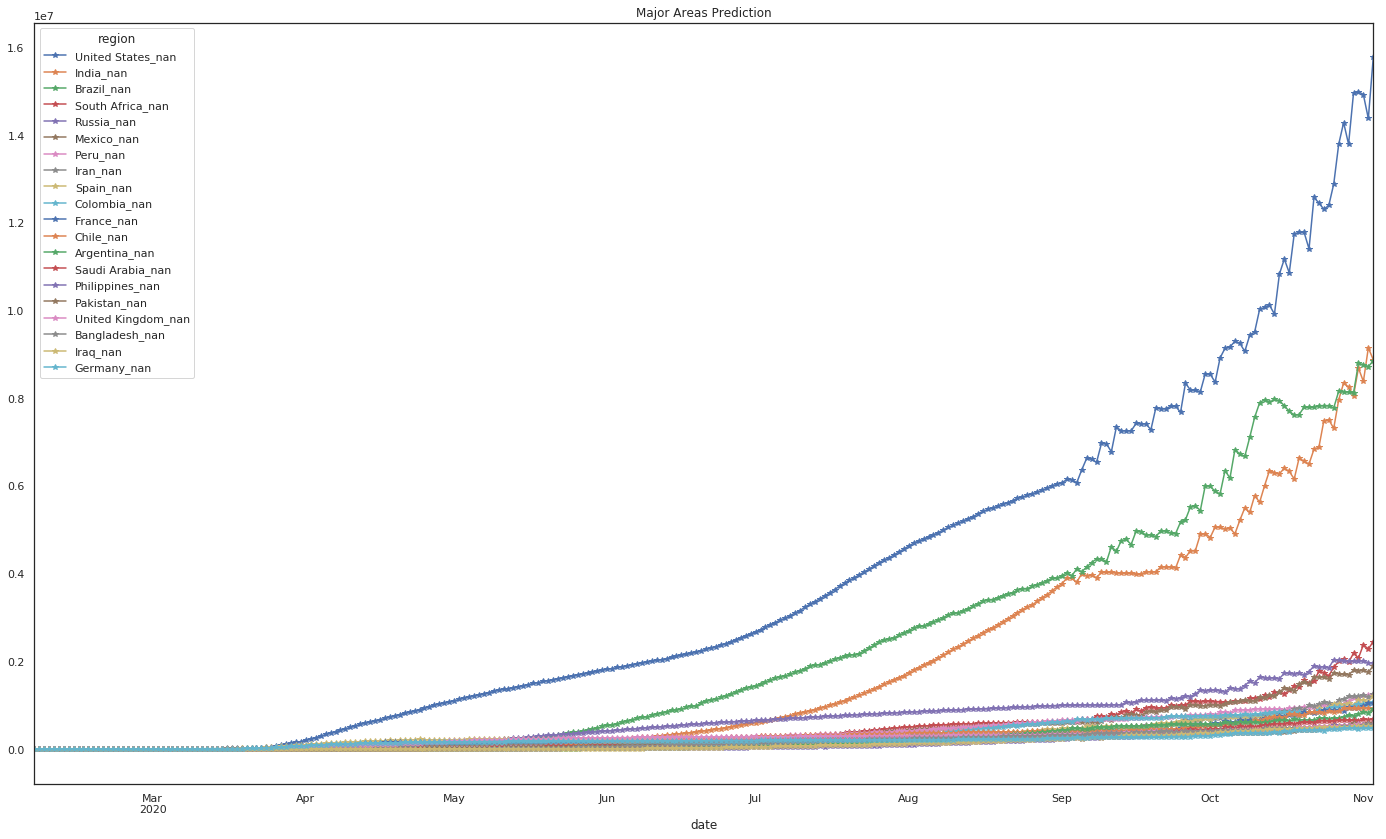

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

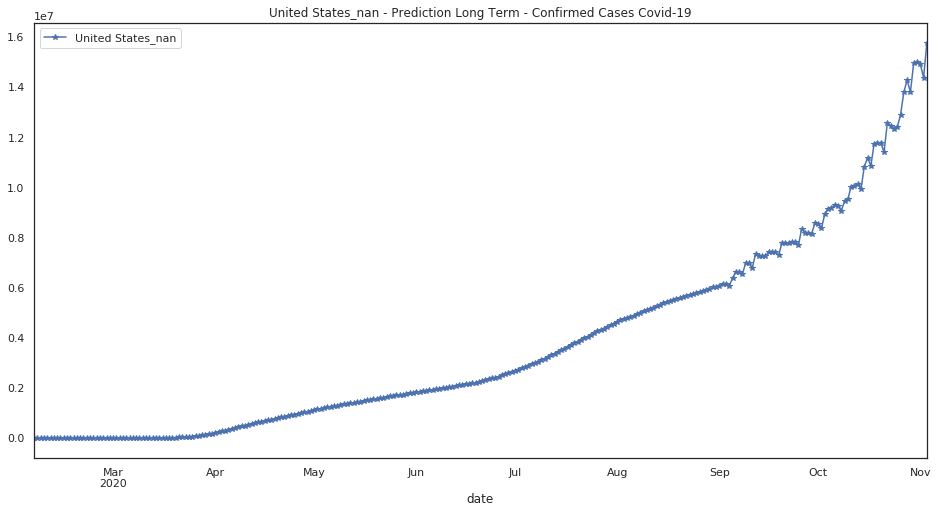

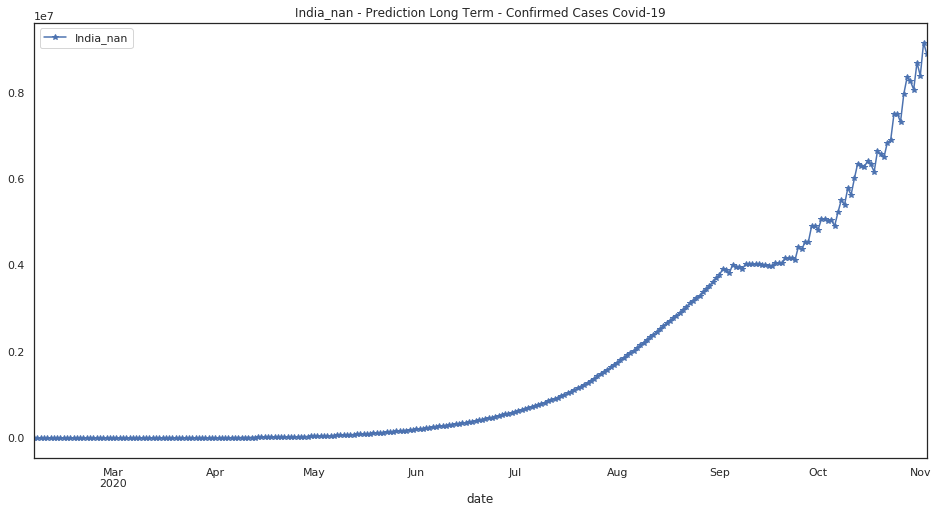

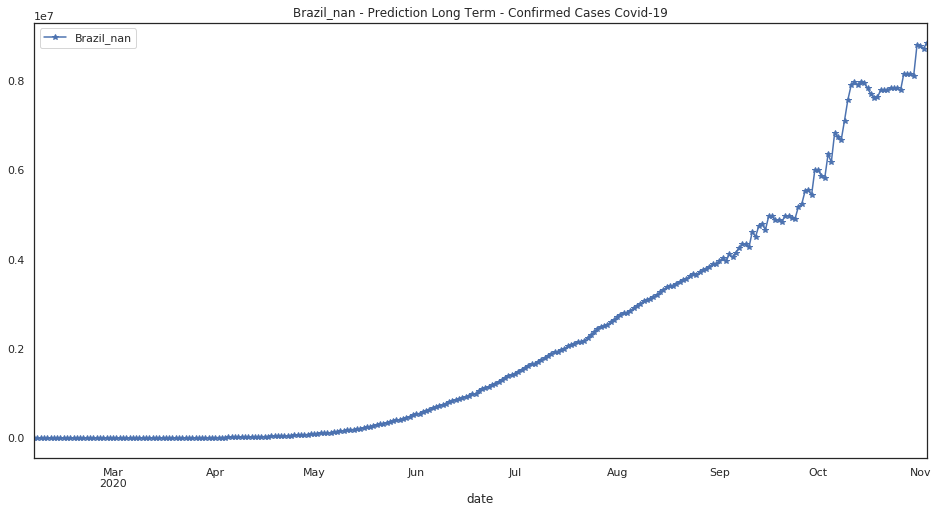

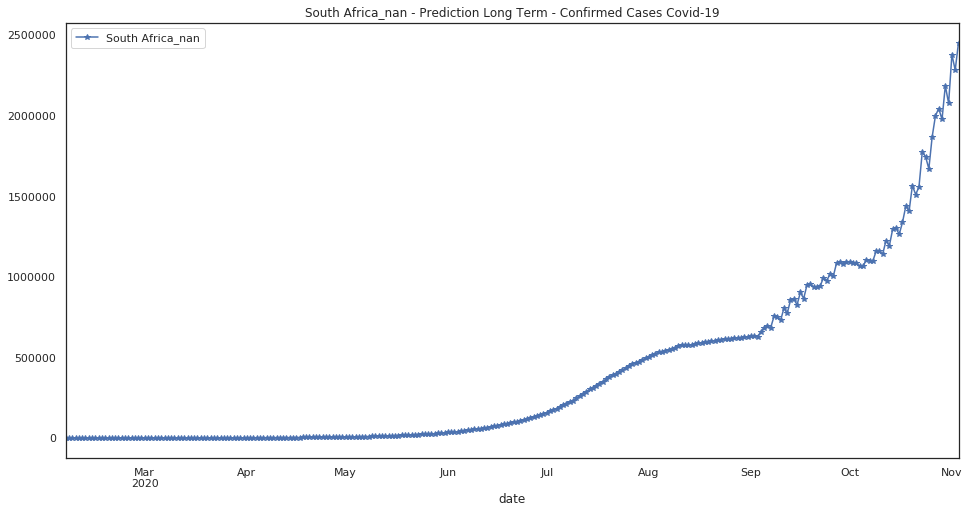

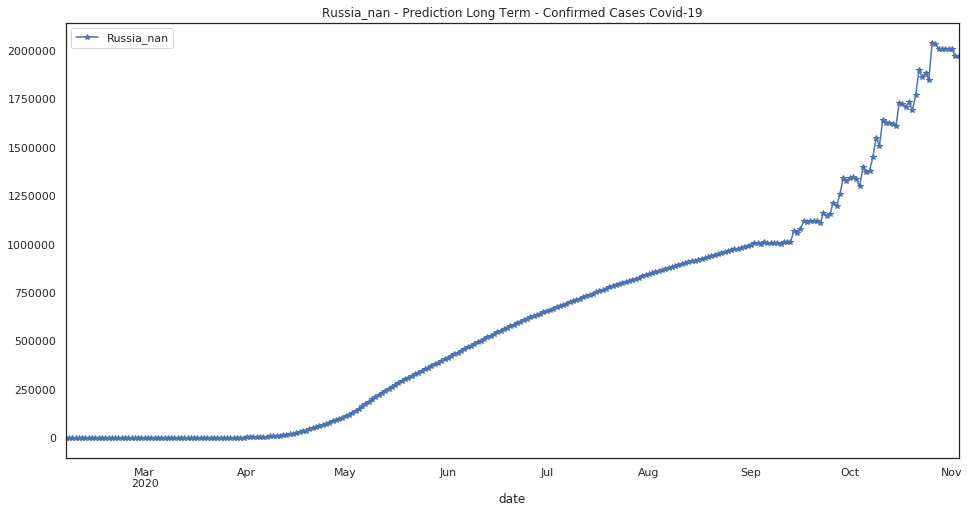

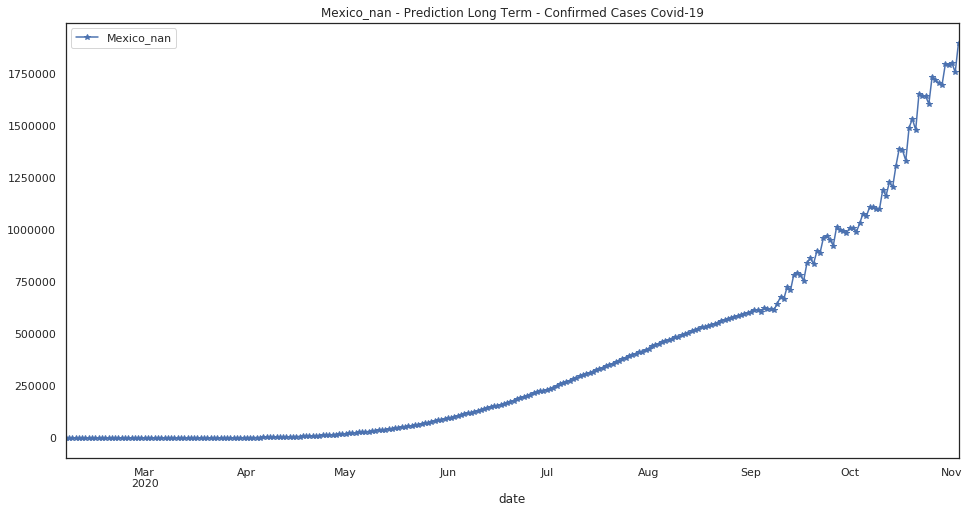

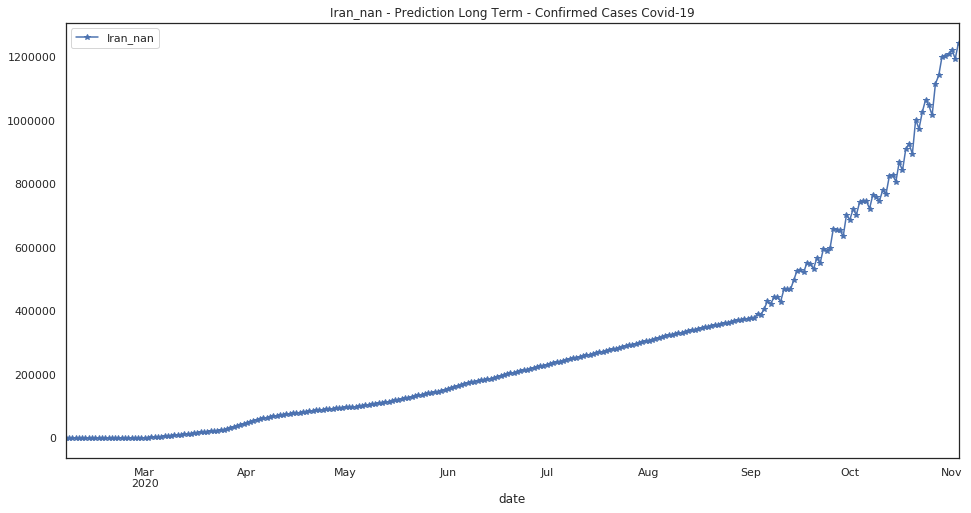

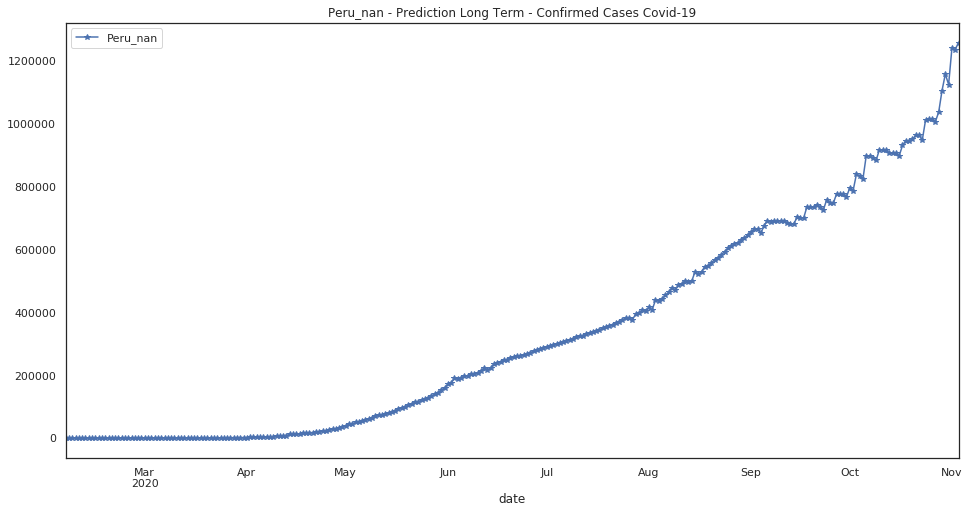

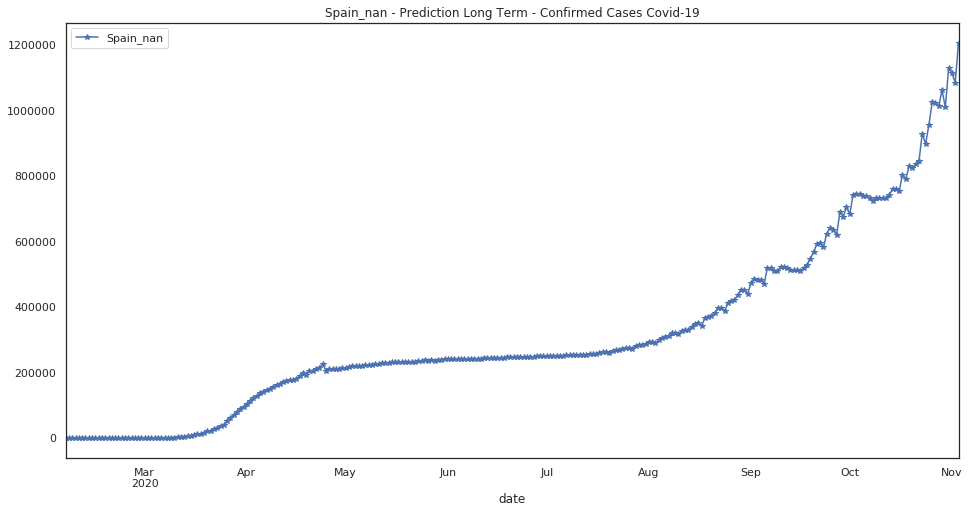

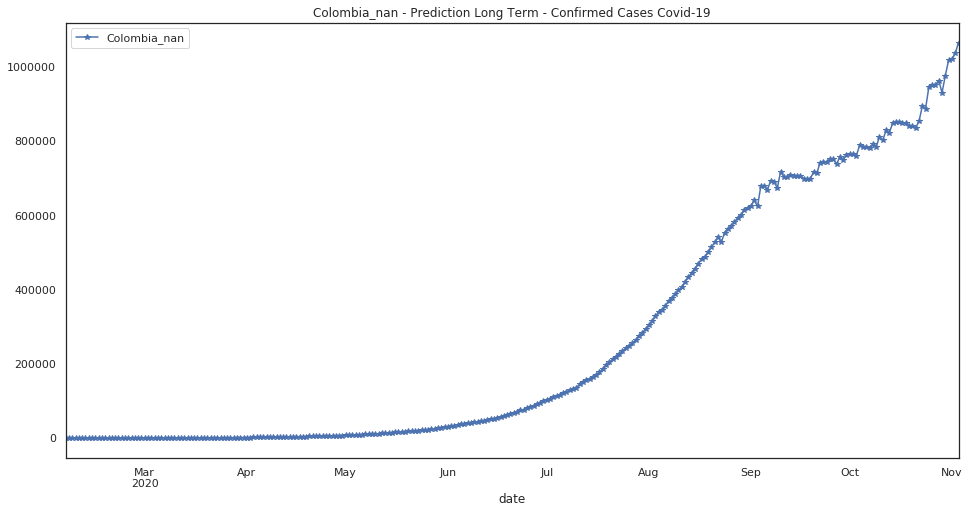

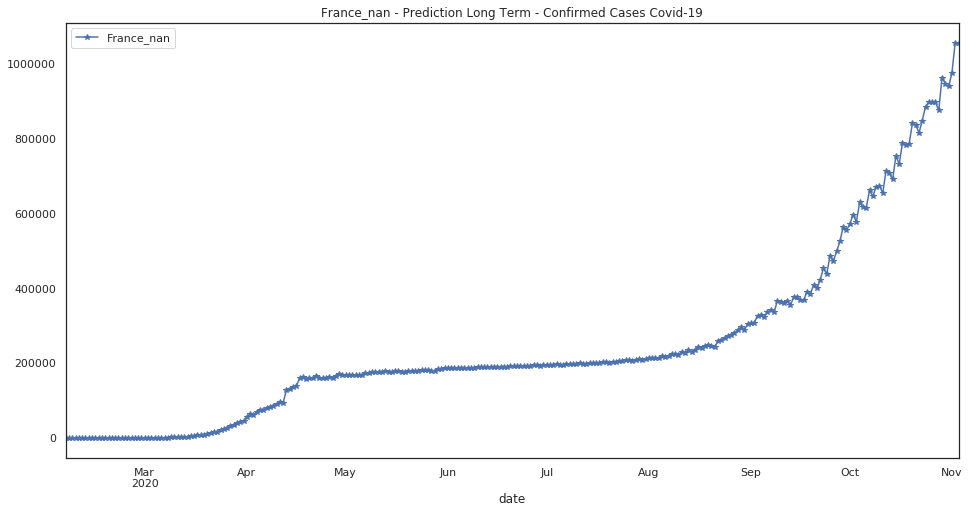

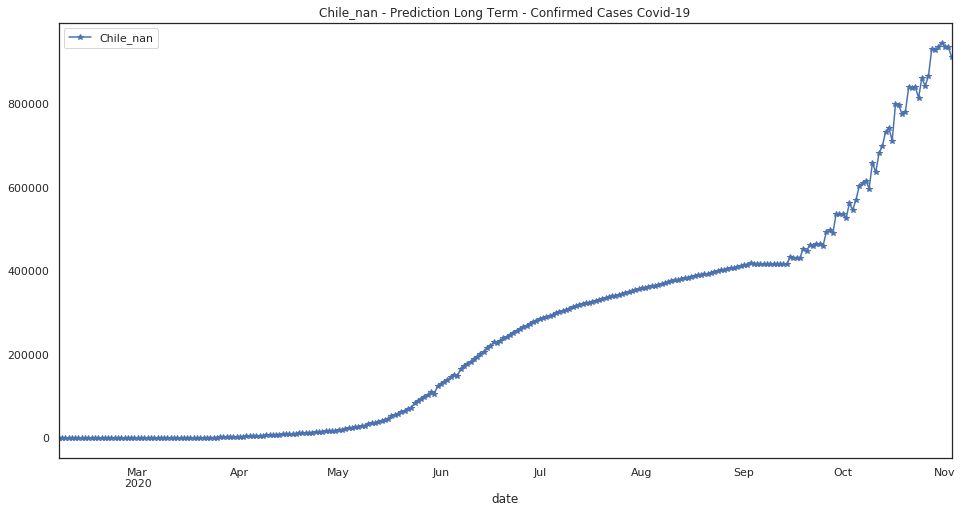

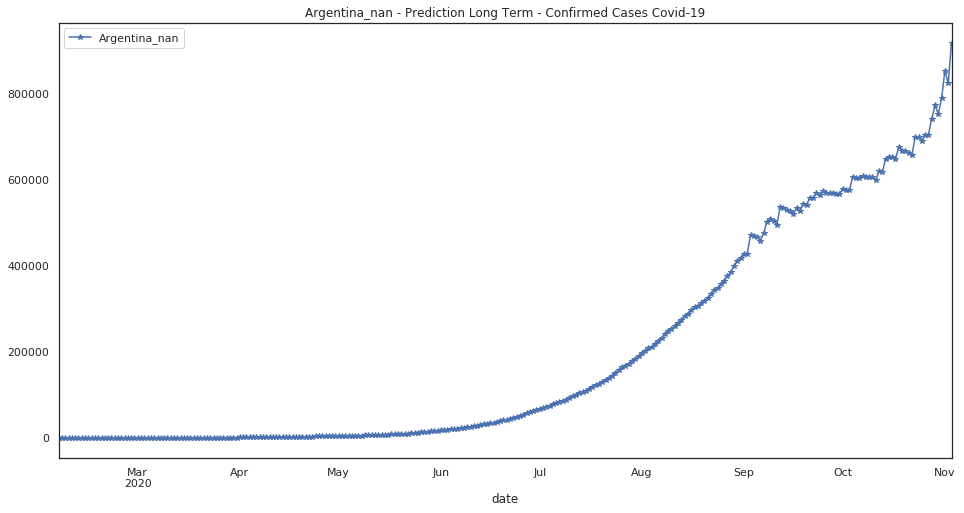

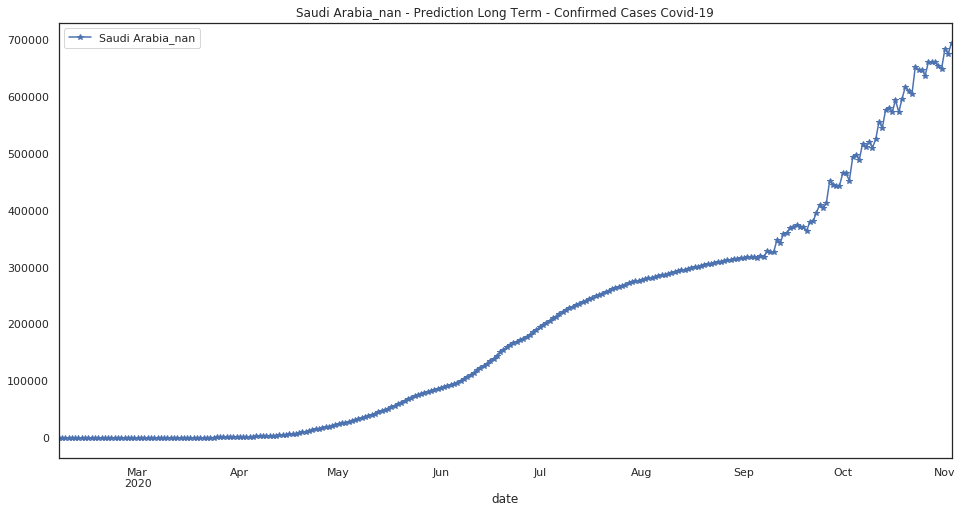

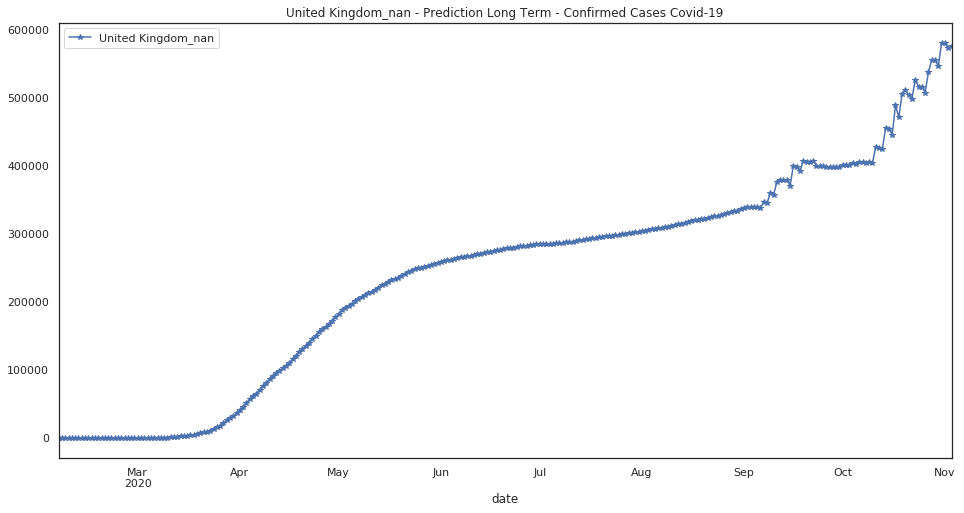

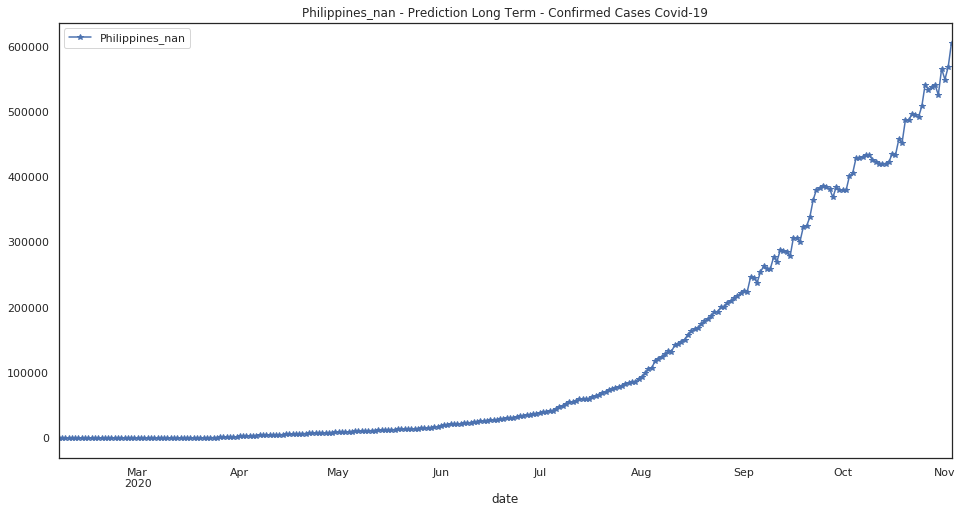

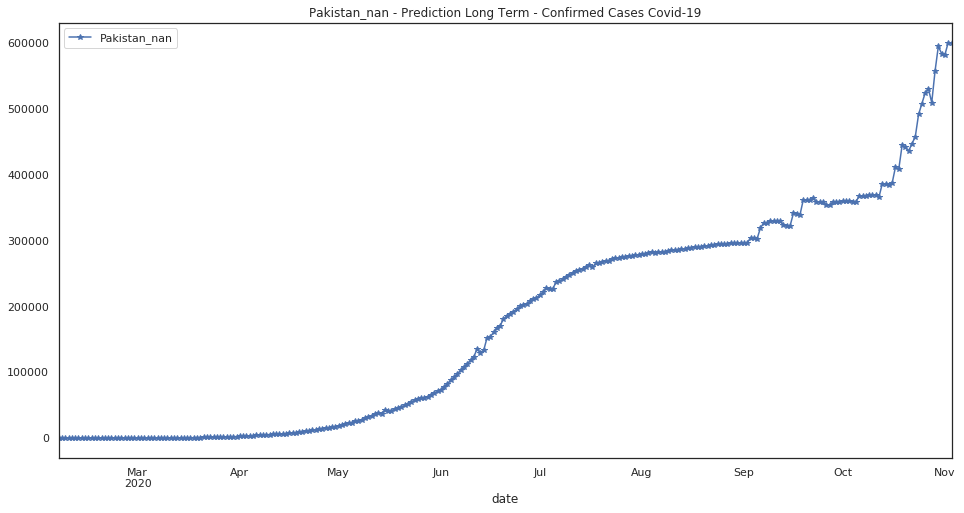

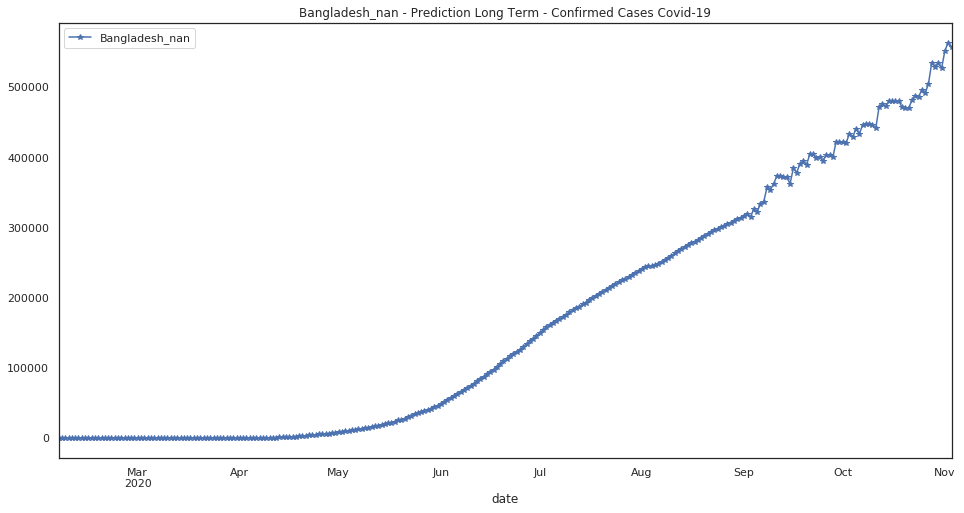

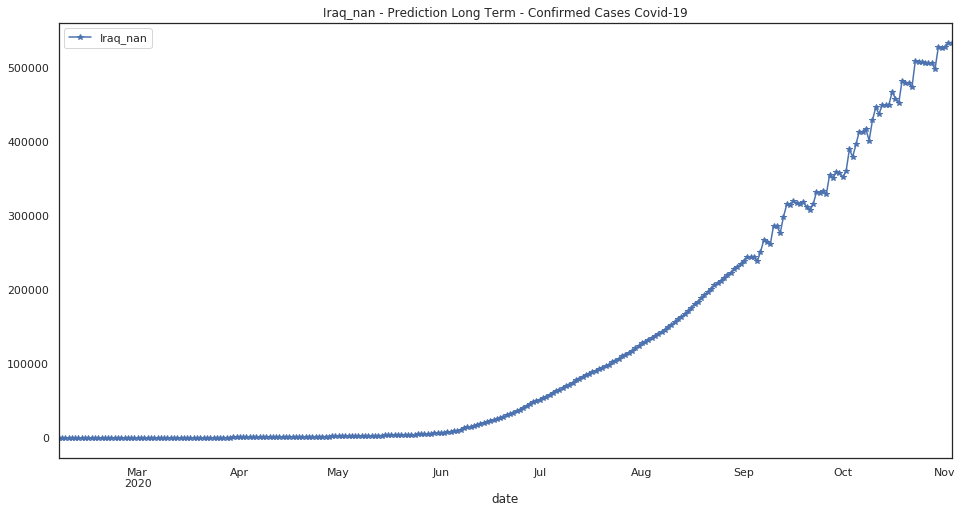

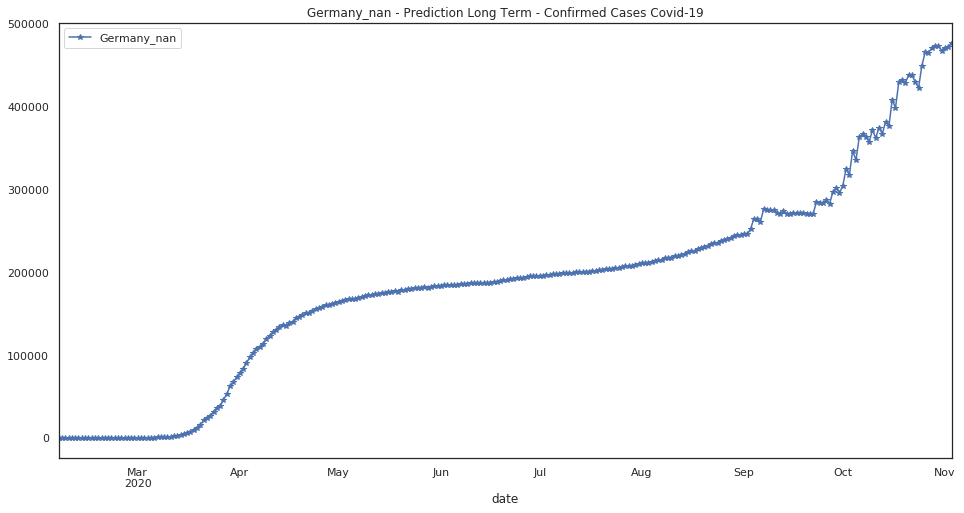

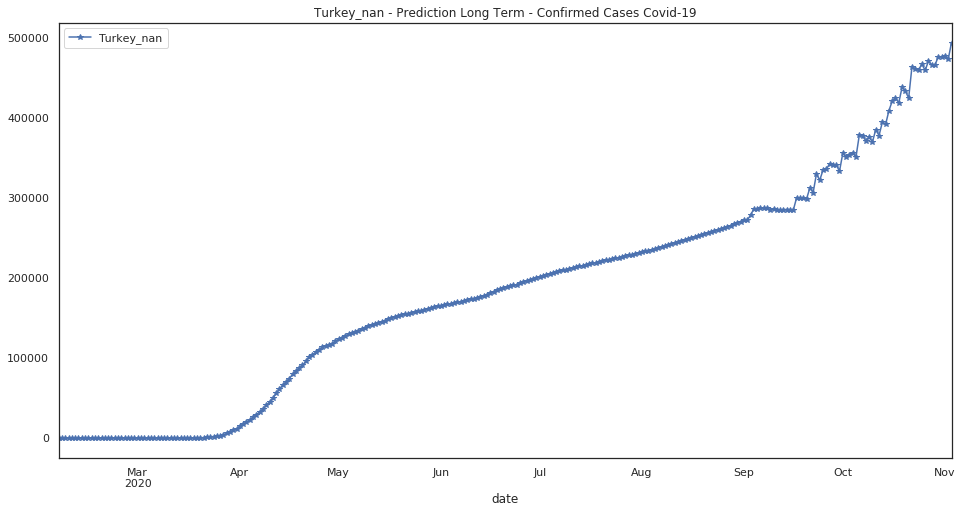

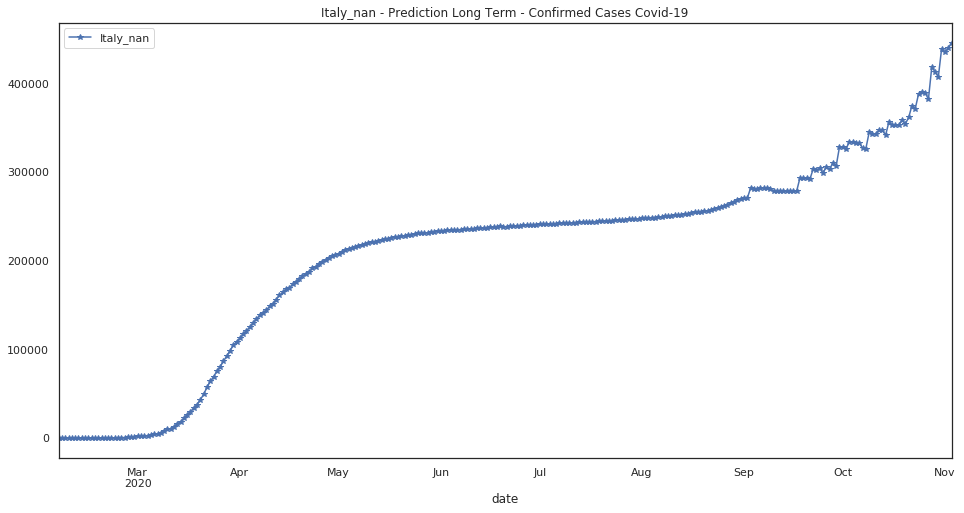

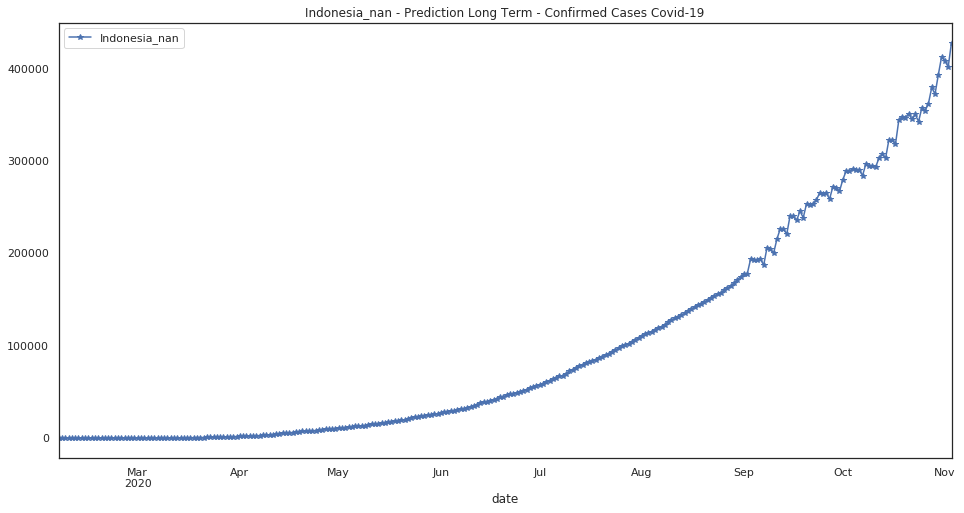

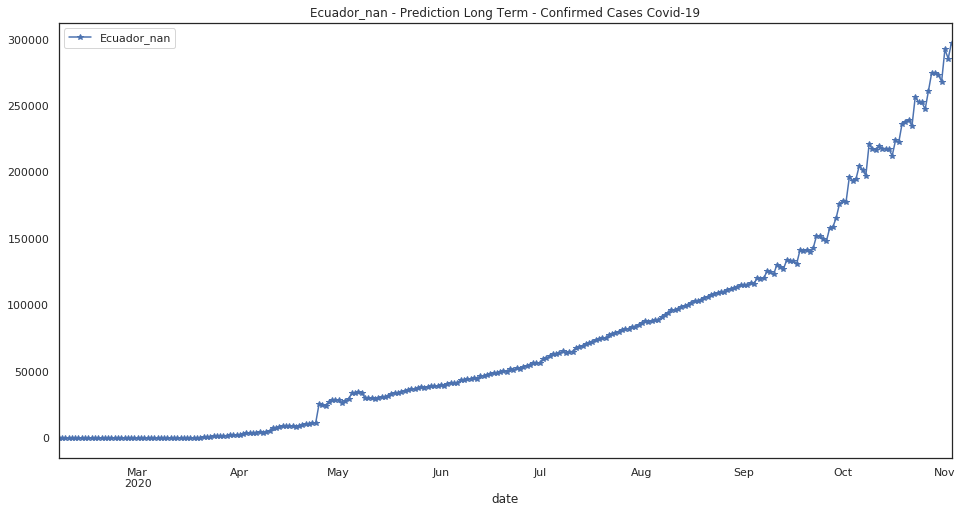

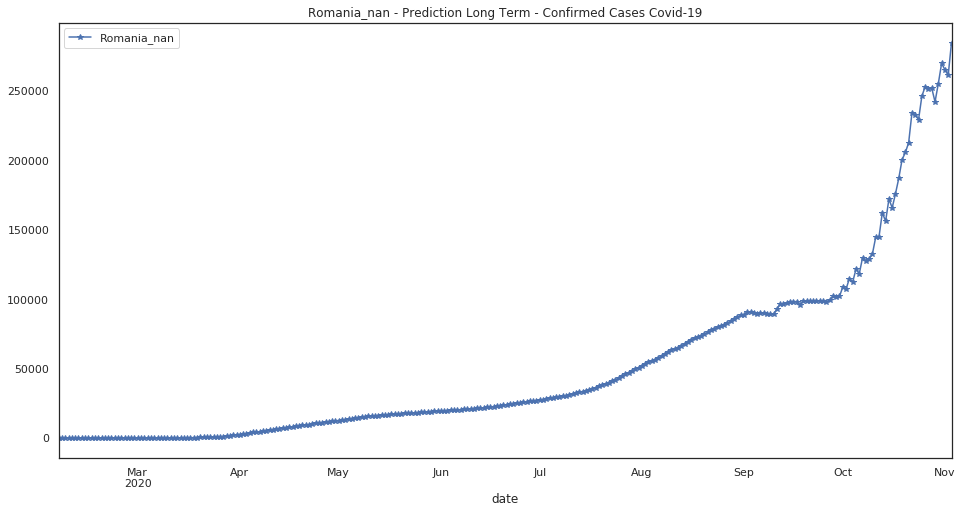

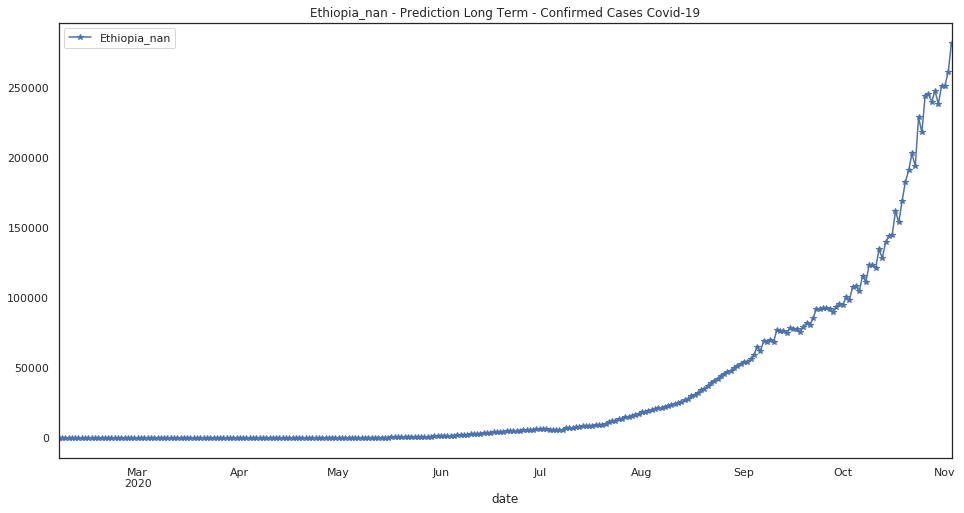

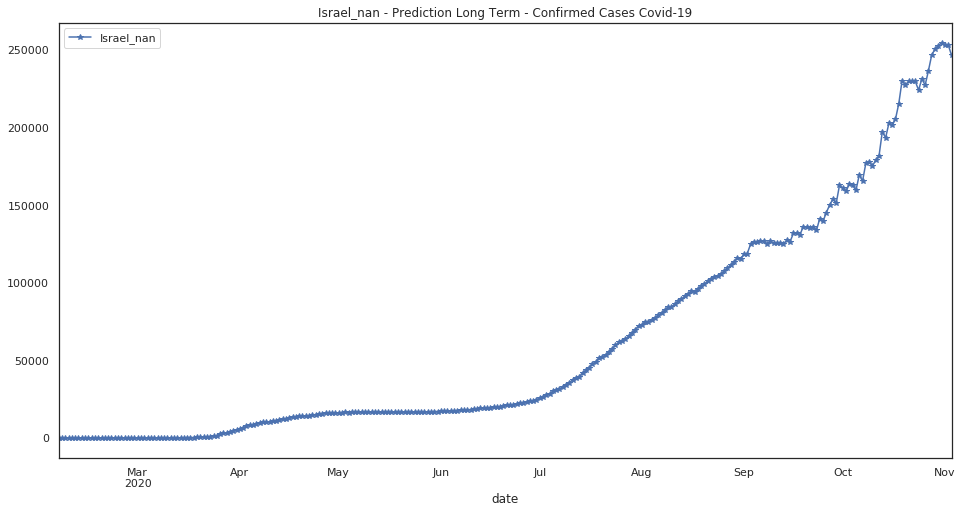

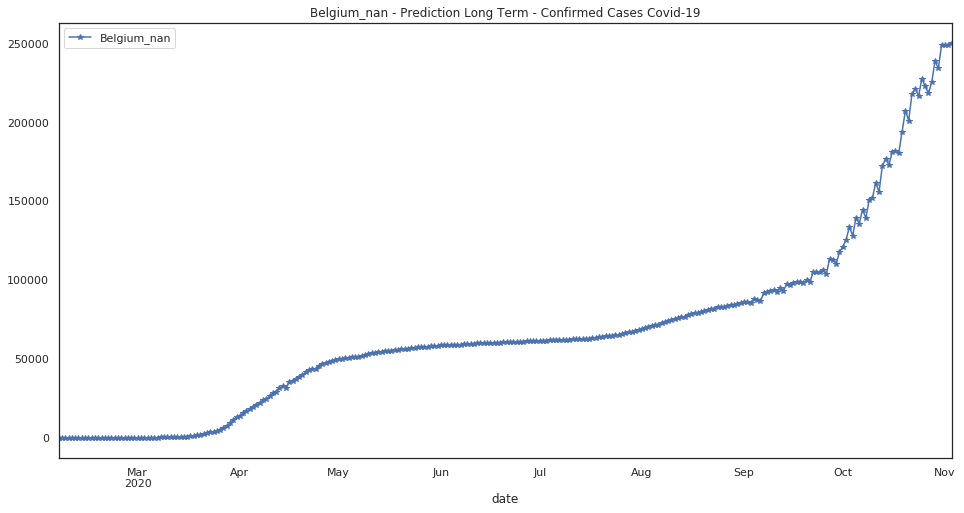

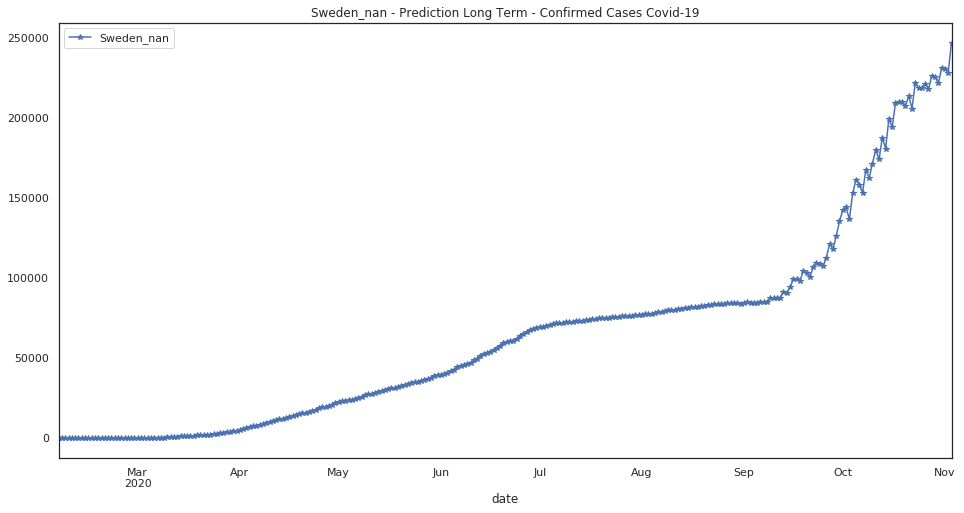

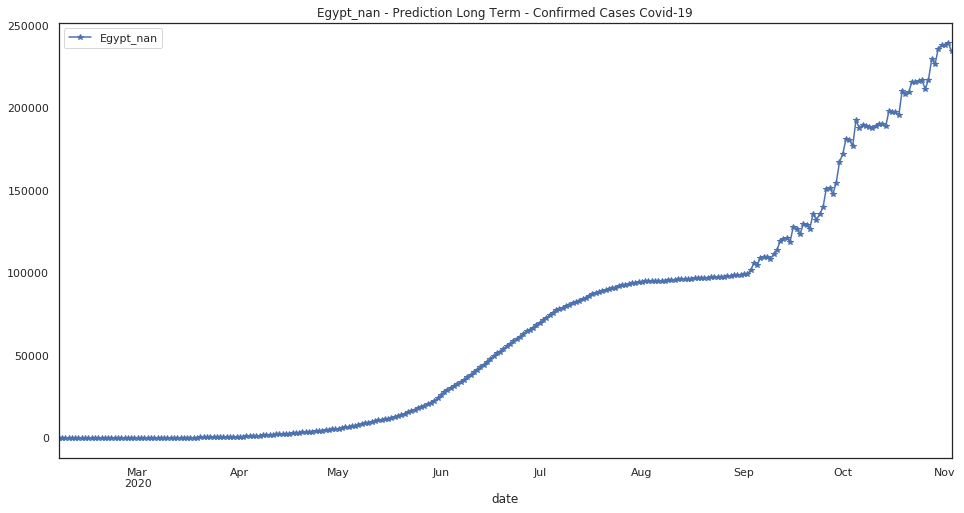

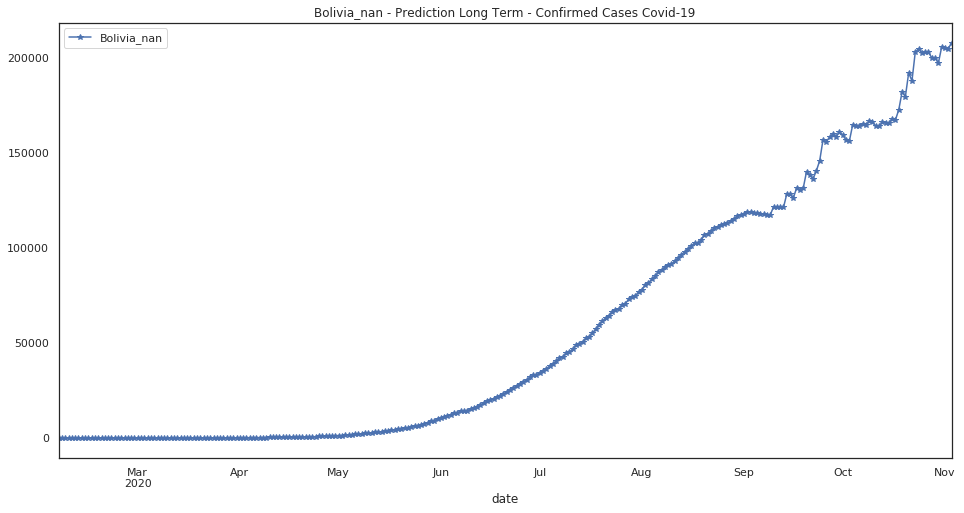

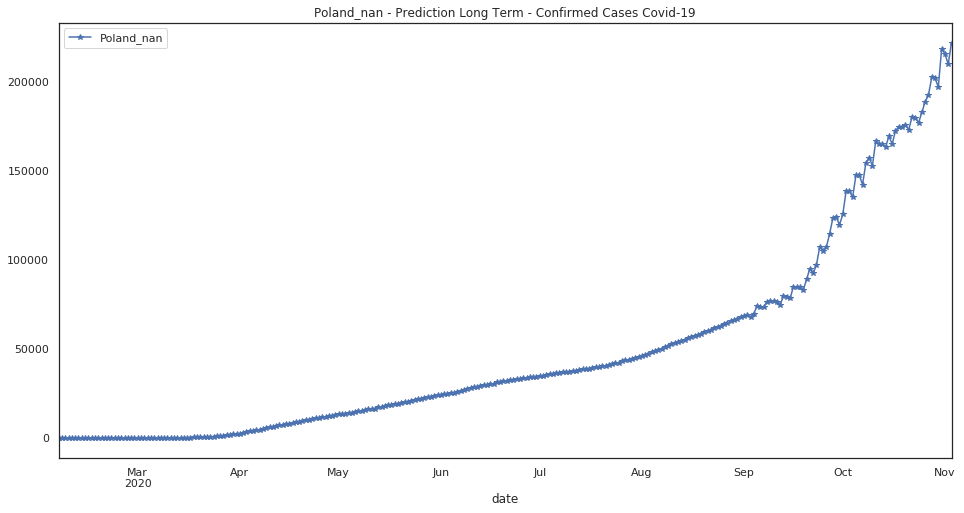

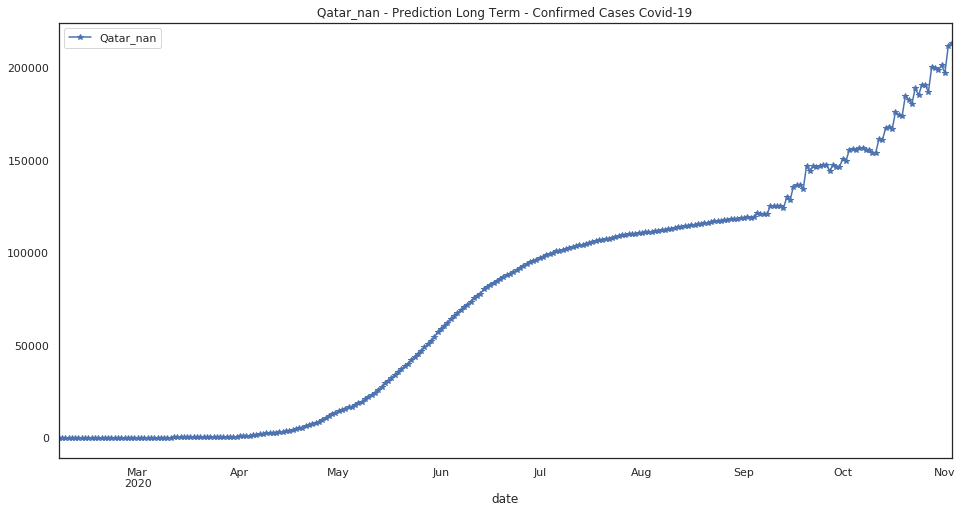

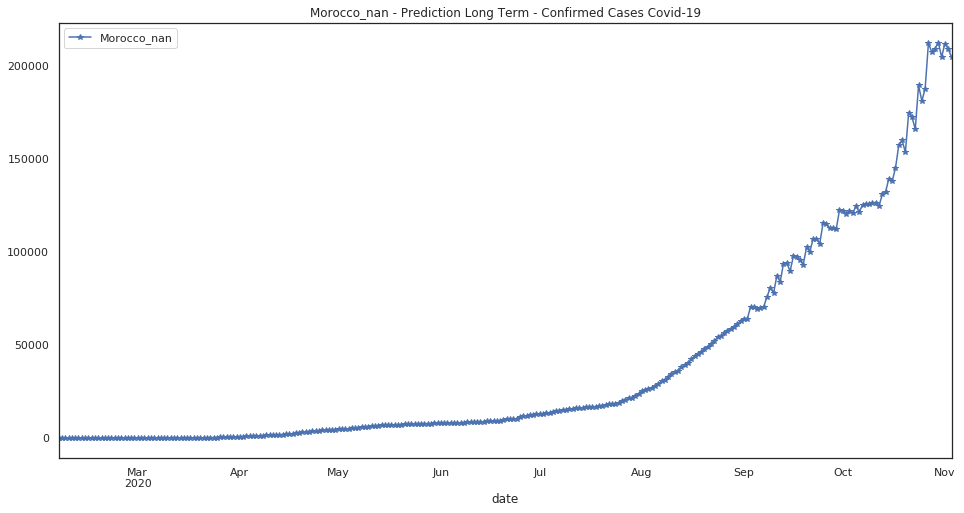

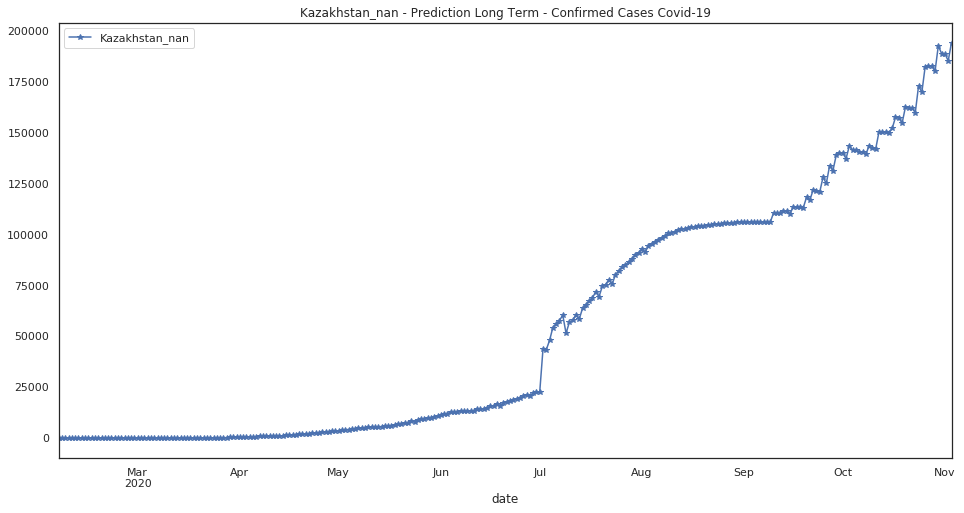

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

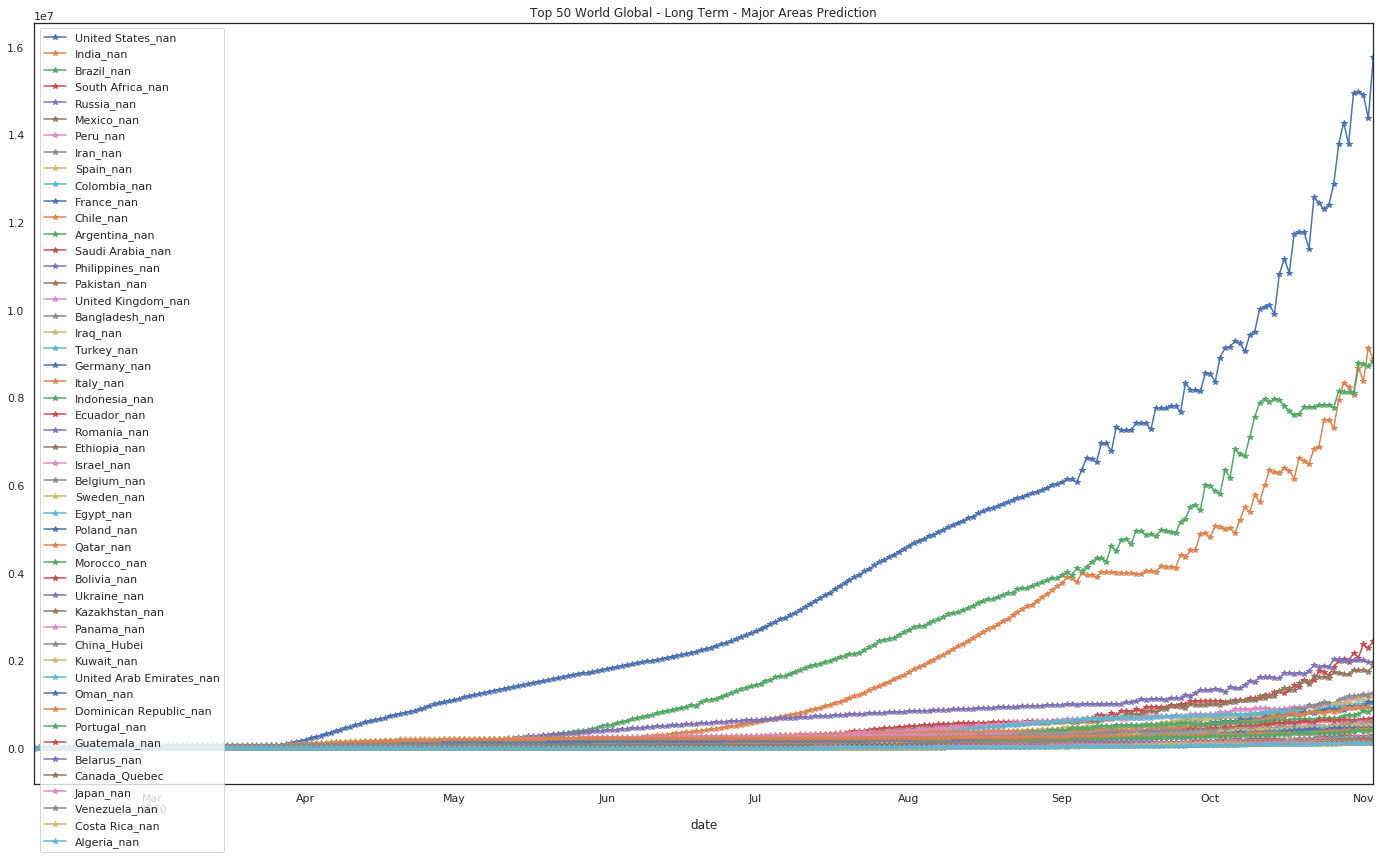

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

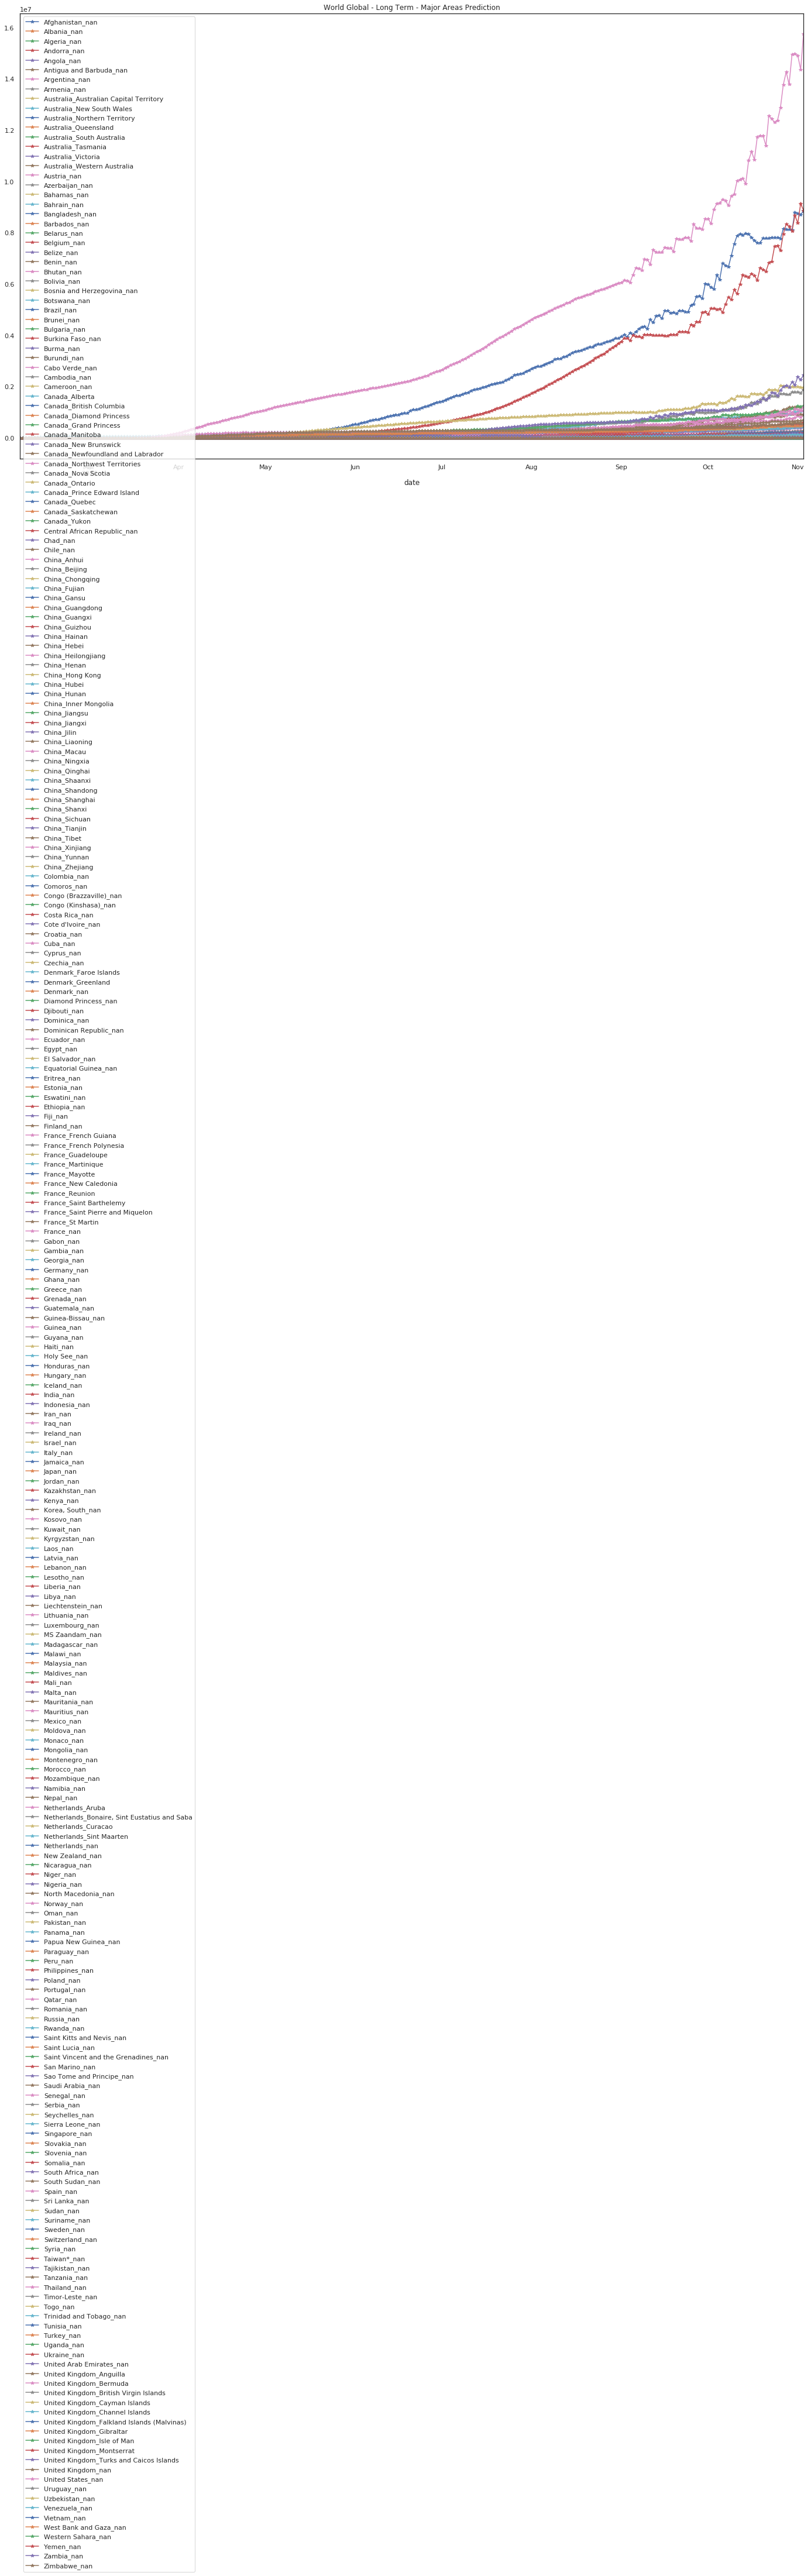

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             42.0         82.0        159.0        205.0   
2020-03-23             66.0         95.0        253.0        270.0   
2020-03-24             45.0        107.0        283.0        229.0   
2020-03-25             99.0        126.0        327.0        177.0   
2020-03-26            117.0        150.0        360.0        201.0   
2020-03-27            126.0        195.0        451.0        234.0   
2020-03-28            160.0        211.0        503.0        280.0   
2020-03-29            156.0        224.0        536.0        336.0   
2020-03-30            134.0        245.0        581.0        356.0   
2020-03-31            227.0        248.0        623.0        418.0   
2020-04-01            178.0        269.0        771.0        417.0   
2020-04-02            266.0        280.0        912.0        413.0   
2020-04-03            334.0        287.0       1029.0        469.0   
2020-04-04            331.0        316.0       1326.0        455.0   
2020-04-05            344.0        349.0       1435.0        468.0   
2020-04-06            428.0        388.0       1502.0        513.0   
2020-04-07            405.0        415.0       1677.0        531.0   
2020-04-08            495.0        413.0       1657.0        557.0   
2020-04-09            494.0        439.0       1752.0        581.0   
2020-04-10            533.0        448.0       1831.0        595.0   
2020-04-11            587.0        440.0       1903.0        627.0   
2020-04-12            611.0        456.0       1954.0        601.0   
2020-04-13            657.0        457.0       2066.0        649.0   
2020-04-14            731.0        485.0       2117.0        650.0   
2020-04-15            759.0        488.0       2212.0        659.0   
2020-04-16            852.0        503.0       2285.0        683.0   
2020-04-17            907.0        534.0       2360.0        673.0   
2020-04-18           1007.0        565.0       2539.0        696.0   
2020-04-19           1016.0        570.0       2681.0        705.0   
2020-04-20           1105.0        581.0       2785.0        713.0   
...                     ...          ...          ...          ...   
2020-10-05          48718.0      12111.0      89862.0       1877.0   
2020-10-06          48719.0      12111.0      89844.0       1877.0   
2020-10-07          48720.0      12111.0      88027.0       1877.0   
2020-10-08          48722.0      12111.0      86589.0       1909.0   
2020-10-09          48630.0      12111.0      94542.0       1965.0   
2020-10-10          49750.0      12111.0      93967.0       1965.0   
2020-10-11          51076.0      12527.0      94033.0       2071.0   
2020-10-12          51032.0      12481.0      93210.0       2071.0   
2020-10-13          51316.0      12655.0      91196.0       2071.0   
2020-10-14          51564.0      12742.0      98381.0       2149.0   
2020-10-15          51565.0      12725.0     101103.0       2145.0   
2020-10-16          50724.0      12805.0      98370.0       2145.0   
2020-10-17          53543.0      12803.0     103063.0       2145.0   
2020-10-18          53104.0      12672.0     102501.0       2209.0   
2020-10-19          53106.0      12679.0     102936.0       2300.0   
2020-10-20          53629.0      12641.0     105137.0       2301.0   
2020-10-21          53631.0      12641.0     112248.0       2326.0   
2020-10-22          53206.0      12641.0     111755.0       2435.0   
2020-10-23          54345.0      12641.0     109565.0       2435.0   
2020-10-24          53585.0      12641.0     122228.0       2531.0   
2020-10-25          53587.0      12641.0     121858.0       2625.0   
2020-10-26          53412.0      12779.0     120981.0       2718.0   
2020-10-27          55180.0      12778.0     123139.0       2718.0   
2020-10-28          55124.0      12778.0     121340.0       2922.0   
2020-10-29

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
238                                Thailand_nan  15.870032  100.992541   
239                             Timor-Leste_nan  -8.874217  125.727539   
240                                    Togo_nan   8.619500    0.824800   
241                     Trinidad and Tobago_nan  10.691800  -61.222500   
242                                 Tunisia_nan  33.886917    9.537499   
243                                  Turkey_nan  38.963700   35.243300   
244                           United States_nan  40.000000 -100.000000   
245                                  Uganda_nan   1.373333   32.290275   
246                                 Ukraine_nan  48.379400   31.165600   
247                    United Arab Emirates_nan  23.424076   53.847818   
248                     United Kingdom_Anguilla  18.220600  -63.068600   
249                      United Kingdom_Bermuda  32.307800  -64.750500   
250       United Kingdom_British Virgin Islands  18.420700  -64.640000   
251               United Kingdom_Cayman Islands  19.313300  -81.254600   
252              United Kingdom_Channel Islands  49.372300   -2.364400   
253  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
254                    United Kingdom_Gibraltar  36.140800   -5.353600   
255                  United Kingdom_Isle of Man  54.236100   -4.548100   
256                   United Kingdom_Montserrat  16.742498  -62.187366   
257     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
258                          United Kingdom_nan  55.378100   -3.436000   
259                                 Uruguay_nan -32.522800  -55.765800   
260                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       2               Algeria_nan  28.033900    1.659600   
1       6             Argentina_nan -38.416100  -63.616700   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      27               Bolivia_nan -16.290200  -63.588700   
6      30                Brazil_nan -14.235000  -51.925300   
7      50             Canada_Quebec  52.939900  -73.549100   
8      55                 Chile_nan -35.675100  -71.543000   
9      69               China_Hubei  30.975600  112.270700   
10     89              Colombia_nan   4.570900  -74.297300   
11     93            Costa Rica_nan   9.748900  -83.753400   
12    105    Dominican Republic_nan  18.735700  -70.162700   
13    106               Ecuador_nan  -1.831200  -78.183400   
14    107                 Egypt_nan  26.820553   30.802498   
15    113              Ethiopia_nan   9.145000   40.489700   
16    126                France_nan  46.227600    2.213700   
17    131               Germany_nan  51.165691   10.451526   
18    135             Guatemala_nan  15.783500  -90.230800   
19    144                 India_nan  20.593684   78.962880   
20    145             Indonesia_nan  -0.789300  113.921300   
21    146                  Iran_nan  32.427908   53.688046   
22    147                  Iraq_nan  33.223191   43.679291   
23    149                Israel_nan  31.046051   34.851612   
24    150                 Italy_nan  41.871940   12.567380   
25    152                 Japan_nan  36.204824  138.252924   
26    154            Kazakhstan_nan  48.019600   66.923700   
27    158                Kuwait_nan  29.311660   47.481766   
28    179                Mexico_nan  23.634500 -102.552800   
29    184               Morocco_nan  31.791700   -7.092600   
30    199                  Oman_nan  21.512583   55.923255   
31    200              Pakistan_nan  30.375300   69.345100   
32    201                Panama_nan   8.538000  -80.782100   
33    204                  Peru_nan  -9.190000  -75.015200   
34    205           Philippines_nan  12.879721  121.774017   
35    206                Poland_nan  51.919400   19.145100   
36    207              Portugal_nan  39.399900   -8.224500   
37    208                 Qatar_nan  25.354800   51.183900   
38    209               Romania_nan  45.943200   24.966800   
39    210                Russia_nan  61.524010  105.318756   
40    217          Saudi Arabia_nan  23.885942   45.079162   
41    226          South Africa_nan -30.559500   22.937500   
42    228                 Spain_nan  40.463667   -3.749220   
43    232                Sweden_nan  60.128161   18.643501   
44    243                Turkey_nan  38.963700   35.243300   
45    244         United States_nan  40.000000 -100.000000   
46    246               Ukraine_nan  48.379400   31.165600   
47    247  United Arab Emirates_nan  23.424076   53.847818   
48    258        United Kingdom_nan  55.378100   -3.436000   
49    261             Venezuela_nan   6.423800  -66.589700   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                  10.0                 10.0                 10.0   
1                  10.0                 10.0                 10.0   
2                  10.0                 10.0                 10.0   
3                  10.0                 10.0                 10.0   
4                  16.0                 17.0                 12.0   
5                  10.0                 10.0                 10.0   
6                  10.0                 10.0                 10.0   
7                  10.0                 10.0                 10.0   
8                  10.0                 10.0                 10.0   
9              -15207.0              22112.0              24953.0   
10                 10.0                 10.0                 10.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()